In [ ]:
%matplotlib inline
%load_ext tensorboard

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from keras import metrics
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.layers import Dropout
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
import random
from sklearn.utils import shuffle
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC
import seaborn as sns
from tensorflow.keras.layers import Concatenate, Dense
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')

try:
  shutil.rmtree('logs')
except:
  pass

In [ ]:
dfS =pd.read_csv('/content/drive/MyDrive/Thesis/fill_msmall.csv')
dfS

,amountalcoholdrunk,everhadknownpersonalcoh,everbeeninjuredrinkalcohol,frequdrinkingalcohol,evertakencannabis,felthatedfamiliychild,physicallyabusedfamiliychild,feltlovedchild,sexuallymolestedchild,someonetakedoctorchild,...,sexualinterferenceadult,abletopaymortgageadult,beenseriousaccidentlifethrea,diagnosedlifethreateningillnes,victimphysicallyviolentcrime,witnessedsuddenviolentdeath,victimsexualassault,diabetes,depression,cvd
0,2.0,1.0,0.0,4.0,3.0,2.0,2.0,2.0,0.0,4.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,1.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,2.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,4.0,...,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0,1,1
3,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,1.0,4.0,...,0.0,4.0,1.0,0.0,1.0,1.0,1.0,0,1,1
4,2.0,0.0,0.0,2.0,3.0,0.0,0.0,4.0,0.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157282,2.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,1.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,1
157283,1.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,0.0,4.0,...,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0,1,0
157284,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.0,...,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0,1,0
157285,3.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,4.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [ ]:
dfB = pd.read_csv('/content/drive/MyDrive/Thesis/fill_mbig.csv')
dfB

,sex,waistcircum,hipcircum,agecompleted,sleepduration,napduringday,sleeplessness,daytimedozing,currenttobacco,pasttobacco,...,cvd,Unemployed,not_working,retired,employed,White,Mixed,AsianorAsianBritish,BlackorBlackBritish,otherEth
0,0.0,74.0,102.0,16.0,7.0,2.0,3.0,0.0,0.0,1.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,120.0,113.0,16.0,9.0,2.0,2.0,0.0,0.0,1.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,66.0,88.0,16.0,5.0,1.0,3.0,0.0,0.0,3.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,110.0,117.0,18.0,7.0,2.0,1.0,0.0,2.0,4.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,94.0,100.0,16.0,6.0,2.0,3.0,0.0,0.0,2.0,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501233,1.0,110.0,113.0,16.0,7.0,2.0,2.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
501234,0.0,102.0,110.0,16.0,6.0,2.0,3.0,0.0,0.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
501235,1.0,99.0,98.0,1.0,7.0,2.0,2.0,1.0,0.0,1.0,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
501236,0.0,86.0,111.0,16.0,6.0,1.0,3.0,0.0,0.0,4.0,...,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
dfm = pd.read_csv('/content/drive/MyDrive/Thesis/fill_m.csv')
dfm

,sex,waistcircum,hipcircum,agecompleted,sleepduration,napduringday,sleeplessness,daytimedozing,currenttobacco,pasttobacco,...,cvd,Unemployed,not_working,retired,employed,White,Mixed,AsianorAsianBritish,BlackorBlackBritish,otherEth
0,0.0,74.0,102.0,16.0,7.0,2.0,3.0,0.0,0.0,1.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,83.0,92.0,16.0,7.0,2.0,2.0,1.0,0.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,93.0,107.0,16.0,8.0,1.0,2.0,0.0,0.0,3.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,67.0,91.0,18.0,8.0,2.0,1.0,0.0,0.0,4.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,94.0,105.0,16.0,7.0,1.0,1.0,0.0,0.0,2.0,...,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157067,0.0,83.0,103.0,16.0,7.0,1.0,3.0,0.0,0.0,4.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
157068,1.0,80.0,101.0,16.0,7.0,1.0,1.0,0.0,0.0,2.0,...,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
157069,0.0,70.0,92.0,16.0,9.0,1.0,2.0,0.0,0.0,4.0,...,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
157070,1.0,110.0,113.0,16.0,7.0,2.0,2.0,0.0,1.0,1.0,...,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


#### Experiment 1: Diabetes, depression and CVDs

Select best features

In [ ]:
df = dfm.copy()
#df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str) +df['cvd'].astype(str)
df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str) +df['cvd'].astype(str)
print("all unique: ", df['all'].value_counts())
#keep rows with only single and no disease subjects
#df = df.loc[(df['all'] == '100') | (df['all'] == '010') | (df['all'] == '001')]
#reset the indexes of the newly created dataframe
df.reset_index(drop=True, inplace=True)
print("all unique: ", df['all'].value_counts())
#print("shape of with single diseases: ", df.shape)

cols = df.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')
cols.remove('all')
df_X = df[cols]
df_Y = df[['all']]

# define feature selection
fs = SelectKBest(k=60).fit(df_X,df_Y)

X_selected = fs.transform(df_X)

# Get columns to keep and create new dataframe with those only
b_cols = fs.get_support(indices=True)
df_new = df_X.iloc[:,b_cols]
bestcols = df_new.columns.to_list()
scores = fs.scores_
print("\nscores: \n", scores)
df_new

all unique:  000    51695
010    45449
001    27321
011    26176
111     2240
101     2215
100     1033
110      943
Name: all, dtype: int64
all unique:  000    51695
010    45449
001    27321
011    26176
111     2240
101     2215
100     1033
110      943
Name: all, dtype: int64

scores: 
 [1.17233499e+03 2.22953717e+03 9.43866574e+02 8.36749379e+00
 1.54081089e+01 3.51796567e+02 5.45951544e+02 1.63743166e+02
 6.77814586e+01 2.44207219e+02 2.30203611e+01 2.01230500e+01
 5.69401052e+00 8.19062086e+00 4.96161801e+01 2.28738969e+01
 1.47604404e+02 4.09529413e+01 1.18817094e+02 1.04529257e+02
 1.17244449e+02 5.16605002e+01 6.01086133e+01 6.73014943e+01
 1.49323058e+02 5.10948367e+01 1.73810296e+01 1.37029658e+01
 3.32805244e+01 2.03348762e+01 3.43262468e+01 7.11970147e+01
 6.54258838e+02 7.96012204e+01 1.35807743e+02 1.02682695e+02
 8.37380328e+00 4.30625214e+01 1.48475598e+03 8.59246794e+02
 1.15000913e+03 1.27501423e+03 9.99481869e+01 2.41905303e+02
 2.88089845e+01 7.06552877e+00 1.624

,sex,waistcircum,hipcircum,napduringday,sleeplessness,daytimedozing,currenttobacco,pasttobacco,processedmeat,beefintake,...,weight,bodyfatpercent,whfolebodyfatmass,wholebodyfatfreemass,age,townsenddeprivation,qualification,not_working,retired,employed
0,0.0,74.0,102.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,...,70.2,35.6,25.0,45.2,57.0,0.994956,11.0,0.0,0.0,1.0
1,1.0,83.0,92.0,2.0,2.0,1.0,0.0,1.0,3.0,1.0,...,65.6,19.0,12.5,53.1,73.0,-2.845980,5.0,0.0,1.0,0.0
2,1.0,93.0,107.0,1.0,2.0,0.0,0.0,3.0,2.0,1.0,...,92.4,23.6,21.8,70.6,57.0,-2.917270,6.0,0.0,0.0,1.0
3,0.0,67.0,91.0,2.0,1.0,0.0,0.0,4.0,1.0,2.0,...,57.2,29.8,17.0,40.2,52.0,-5.797330,0.0,0.0,0.0,1.0
4,1.0,94.0,105.0,1.0,1.0,0.0,0.0,2.0,3.0,1.0,...,89.6,21.0,18.8,70.8,48.0,-2.281880,11.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157067,0.0,83.0,103.0,1.0,3.0,0.0,0.0,4.0,1.0,2.0,...,71.7,36.1,25.9,45.8,61.0,-2.717350,15.0,0.0,0.0,1.0
157068,1.0,80.0,101.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,...,72.1,16.9,12.2,59.9,45.0,-5.872370,5.0,0.0,0.0,1.0
157069,0.0,70.0,92.0,1.0,2.0,0.0,0.0,4.0,0.0,0.0,...,57.1,29.2,16.7,40.4,61.0,-0.949166,5.0,0.0,0.0,1.0
157070,1.0,110.0,113.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,...,110.5,27.0,29.8,80.7,66.0,-3.093120,0.0,0.0,0.0,1.0


60
90
{'sex': 1172.3349913147129, 'waistcircum': 2229.5371708377816, 'hipcircum': 943.8665740732802, 'napduringday': 351.7965666858898, 'sleeplessness': 545.9515437624952, 'daytimedozing': 163.74316644445807, 'currenttobacco': 67.78145863699102, 'pasttobacco': 244.20721910801285, 'processedmeat': 147.60440423226933, 'beefintake': 118.8170942245747, 'lambintake': 104.52925676642032, 'porkintake': 117.24444862597758, 'cheeseintake': 51.660500226492665, 'milkused': 60.10861332614021, 'spreadtype': 67.30149426932051, 'breadintake': 149.3230576701809, 'breadtype': 51.09483672772488, 'waterintake': 71.19701469547016, 'majordietarychang': 654.2588375687778, 'variationdiet': 79.60122038869886, 'alcoholintake': 135.80774311684493, 'breastfedbaby': 102.68269499765861, 'freqdepressed': 1484.7559844559803, 'frequnenthusiasm2weeks': 859.2467936603841, 'freqtensenness2weeks': 1150.009125722906, 'freqtiredness2weeks': 1275.0142258625258, 'nonbutterspread': 99.94818694582779, 'smoking': 241.9053027584

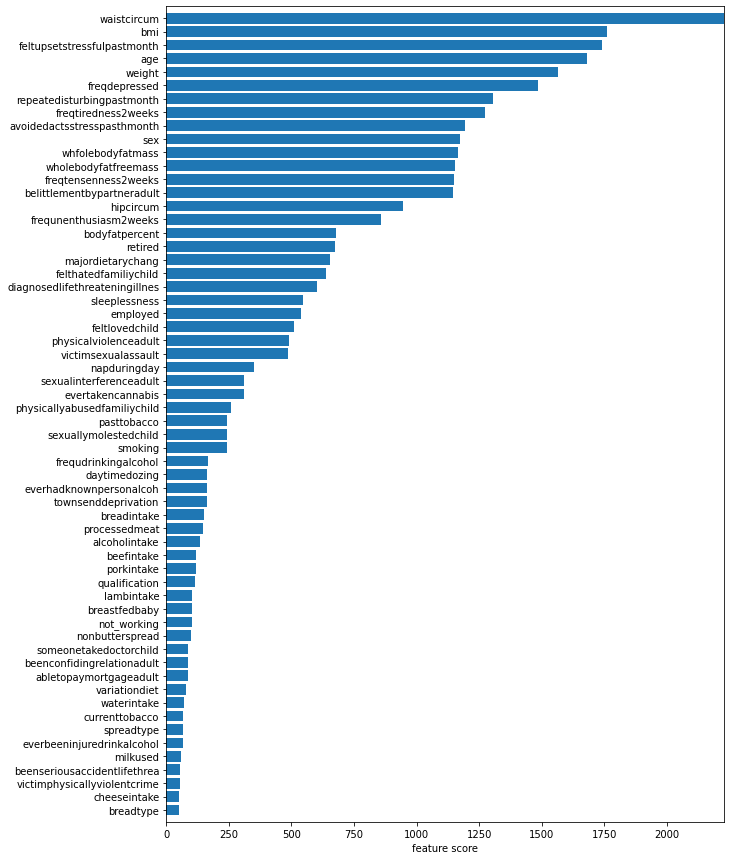

In [ ]:
li = df_X.columns.to_list()
scoresl = scores.tolist()
bestscore = []
for each in bestcols:
  bestscore.append(scoresl[li.index(each)])

print(len(bestscore))
print(len(li))
res = {}
for each in bestcols:
  res[each] = bestscore[bestcols.index(each)]
print(res)
ress = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

plt.figure(figsize=(10,15))
plt.margins(x=0, y=0.008)
plt.xlabel("feature score")
plt.barh(list(ress.keys()), list(ress.values()))
plt.show()

In [ ]:
#dictionary specifying the data type i.c. categorical or int or cont for each column
feat_cat = {'sex': 'cat',
 'waistcircum': 'cont',
 'hipcircum': 'cont',
 'sleepduration': 'int',
 'napduringday': 'cat',
 'sleeplessness': 'cat',
 'daytimedozing': 'cat',
 'currenttobacco': 'cat',
 'cookedvegetable': 'int',
 'saladintake': 'int',
 'fruitintake': 'int',
 'driedfruit': 'int',
 'oilyfishintake': 'cat',
 'nonoilyfish': 'cat',
 'processedmeat': 'cat',
 'poultryintake': 'cat',
 'beefintake': 'cat',
 'lambintake': 'cat',
 'porkintake': 'cat',
 'cheeseintake': 'cat',
 'milkused': 'cat',
 'spreadtype': 'cat',
 'breadintake': 'int',
 'breadtype': 'cat',
 'cerealintake': 'int',
 'salttofood': 'cat',
 'teaintake': 'int',
 'waterintake': 'int',
 'majordietarychang': 'cat',
 'variationdiet': 'cat',
 'alcoholintake': 'cat',
 'adoptedaschild': 'cat',
 'freqdepressed': 'cat',
 'frequnenthusiasm2weeks': 'cat',
 'freqtensenness2weeks': 'cat',
 'freqtiredness2weeks': 'cat',
 'currentemployment': 'cat',
 'smoking': 'cat',
 'alcoholdrinkerstatus': 'cat',
 'ethnic': 'cat',
 'bmi': 'cont',
 'weight': 'cont',
 'bodyfatpercent': 'cont',
 'whfolebodyfatmass': 'cont',
 'wholebodyfatfreemass': 'cont',
 'summedMETminutes': 'cont',
 'qualification': 'cat',
 'agecompleted': 'int',
 'pasttobacco': 'cat',
 'cerealtype': 'cat',
 'coffetype': 'cat',
 'breastfedbaby': 'cat',
 'maternalsmoking': 'cat',
 'nonbutterspread': 'cat',    
 'depression': 'cat',
 'diabetes': 'cat',
 'cvd': 'cat',
 'someonetakedoctorchild': 'cat',
 'sexuallymolestedchild': 'cat',
 'feltlovedchild': 'cat',
 'physicallyabusedfamiliychild': 'cat',
 'felthatedfamiliychild': 'cat',
 'amountalcoholdrunk': 'cat',
 'everhadknownpersonalcoh': 'cat',
 'everbeeninjuredrinkalcohol': 'cat',
 'frequdrinkingalcohol': 'cat',
 'evertakencannabis': 'cat',
 'avoidedactsstresspasthmonth': 'cat',
 'repeatedisturbingpastmonth': 'cat',
 'feltupsetstressfulpastmonth': 'cat',
 'belittlementbypartneradult': 'cat',
 'beenconfidingrelationadult': 'cat',
 'physicalviolenceadult': 'cat',
 'sexualinterferenceadult': 'cat',
 'abletopaymortgageadult': 'cat',
 'beenseriousaccidentlifethrea': 'cat',
 'diagnosedlifethreateningillnes': 'cat',
 'victimphysicallyviolentcrime': 'cat',
 'witnessedsuddenviolentdeath': 'cat',
 'victimsexualassault': 'cat',
 'hardphysicalactivity': 'cat',
 'moderatephysicalactivity': 'cat',
 'softphysicalactivity': 'cat',
 'Unemployed': 'cat',
 'not_working': 'cat',
 'retired': 'cat',
 'employed': 'cat',
 'White': 'cat',
 'Mixed': 'cat',
 'AsianorAsianBritish': 'cat',
 'BlackorBlackBritish': 'cat',
 'otherEth': 'cat',
 'age': 'int',
 'townsenddeprivation': 'cont',
 'adoptedasachild': 'cat'
           }

cols = dfB.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

#get indexes of categorical features
categorical_featB = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featB.append(cols.index(each))
print(categorical_featB)

[0, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 50, 51, 52, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [ ]:
#using oversampling to predict diabetes, depression and cvd
print("-----Preparing initial datasets - Train and holdout-----")
cols = dfB.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

colsB = []
for each in cols:
  if each in bestcols:
    colsB.append(each)
print("colsB len: ", len(colsB))

df_XB = dfB[colsB]
df_YB = dfB[['diabetes', 'depression', 'cvd']]
#df_YB = df_YB.replace({0:1, 1:0})
cols = dfS.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

colsS = []
for each in cols:
  if each in bestcols:
    colsS.append(each)
print("colsS len: ", len(colsS))

df_XS = dfS[colsS]
df_YS = dfS[['diabetes', 'depression', 'cvd']]
#df_YS = df_YS.replace({0:1, 1:0})

#get indexes of categorical features
categorical_featB = []
for each in colsB:
    if feat_cat[each] == 'cat':
        categorical_featB.append(colsB.index(each))

nB_cols = len(colsB)
nS_cols = len(colsS)
print("nB_cols: ", nB_cols)
print("nS_cols: ", nS_cols)

#prepare train and test dataset manually from the bigger dataset
test_size  = int(df_XB.shape[0] * 0.02)
df1 = df_YB.copy()
df1['out'] = df1['diabetes'].astype(str) + df1['depression'].astype(str) +df1['cvd'].astype(str)
dis_cols  = df1['out'].unique().tolist()
rowsfortestB = []
for each in dis_cols:
  tempY = df1[df1.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestB.append(rows)

rowsfortestB = [j for i in rowsfortestB for j in i]
X_testB = df_XB.loc[rowsfortestB]
y_testB = df_YB.loc[rowsfortestB]
X_trainB = df_XB.loc[~df_XB.index.isin(rowsfortestB)]
y_trainB= df_YB.loc[~df_YB.index.isin(rowsfortestB)]

print("\nDistribution of Dataset B")
print("shape of X_trainB: ", X_trainB.shape)
print("shape of y_trainB: ", y_trainB.shape)
print("shape of X_testB: ", X_testB.shape)
print("shape of y_testB: ", y_testB.shape)

#prepare train and test dataset manually from the small dataset
df1S = df_YS.copy()
df1S['out'] = df1S['diabetes'].astype(str) + df1S['depression'].astype(str) +df1S['cvd'].astype(str)

rowsfortestS = []
for each in dis_cols:
  tempY = df1S[df1S.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestS.append(rows)

rowsfortestS = [j for i in rowsfortestS for j in i]
X_testS = df_XS.loc[rowsfortestS]
y_testS = df_YS.loc[rowsfortestS]
X_trainS = df_XS.loc[~df_XS.index.isin(rowsfortestS)]
y_trainS = df_YS.loc[~df_YS.index.isin(rowsfortestS)]

print("\nDistribution of Dataset S")
print("shape of X_trainS: ", X_trainS.shape)
print("shape of y_trainS: ", y_trainS.shape)
print("shape of X_testS: ", X_testS.shape)
print("shape of y_testS: ", y_testS.shape)



#for smaller dataset
# perform a scaler transform on train and test dataset
trans = StandardScaler()
trans.fit(X_trainB)

data1 = trans.transform(X_trainB)
X_trainB = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans.transform(X_testB)
X_testB = pd.DataFrame(data2)

#for smaller dataset
# perform a scaler transform on train and test dataset
trans1 = StandardScaler()
trans1.fit(X_trainS)

data1 = trans1.transform(X_trainS)
X_trainS = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans1.transform(X_testS)
X_testS = pd.DataFrame(data2)


# Model configuration
batch_size = 500
no_epochs = 5
verbosity = 1
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=2, random_state=36851234)

# K-fold Cross Validation model evaluation
fold_no = 1

inputs = X_trainB.copy()
targets = y_trainB.copy()


# Define the layers of the model
input_A = Input(shape = (44,), name = 'Dataset A')
input_B = Input(shape = (16,), name = 'Dataset B')
out = Concatenate()([input_A, input_B])
dense_hidden_1 = Dense(60, activation = 'relu', name = 'dense_hidden_1')(out)
dense_hidden_1_d = Dropout(0.5)(dense_hidden_1)
dense_hidden_2 = Dense(55, activation = 'relu', name = 'dense_hidden_2')(dense_hidden_1_d)
dense_hidden_2_d = Dropout(0.25)(dense_hidden_2)
dense_hidden_3 = Dense(50, activation = 'relu', name = 'dense_hidden_3')(dense_hidden_2_d)
dense_hidden_3_d = Dropout(0.1)(dense_hidden_3)
dense_hidden_4 = Dense(45, activation = 'relu', name = 'dense_hidden_4')(dense_hidden_3_d)


dense_branch_diab1 = Dense(40, activation = 'relu', name = 'dense_branch_diab1')(dense_hidden_4)
#dense_hidden_diab1_d = Dropout(0.25)(dense_branch_diab1)
dense_branch_diab2 = Dense(35, activation = 'relu', name = 'dense_branch_diab2')(dense_branch_diab1)
dense_branch_diab3 = Dense(30, activation = 'relu', name = 'dense_branch_diab3')(dense_branch_diab2)
dense_branch_diab4 = Dense(20, activation = 'relu', name = 'dense_branch_diab4')(dense_branch_diab2)
diabetes = Dense(1, activation = 'sigmoid', name = 'diabetes')(dense_branch_diab4)


dense_branch_depr1 = Dense(40, activation = 'relu', name = 'dense_branch_depr1')(dense_hidden_4)
#dense_hidden_depr1_d = Dropout(0.1)(dense_branch_depr1)
dense_branch_depr2 = Dense(35, activation = 'relu', name = 'dense_branch_depr2')(dense_branch_depr1)
dense_branch_depr3 = Dense(30, activation = 'relu', name = 'dense_branch_depr3')(dense_branch_depr2)
dense_branch_depr4 = Dense(20, activation = 'relu', name = 'dense_branch_depr4')(dense_branch_depr3)
depression = Dense(1, activation = 'sigmoid', name ='depression')(dense_branch_depr4)

dense_branch_cvd1 = Dense(40, activation = 'relu', name = 'dense_branch_cvd1')(dense_hidden_4)
#dense_hidden_cvd1_d = Dropout(0.25)(dense_branch_cvd1)
dense_branch_cvd2 = Dense(35, activation = 'relu', name = 'dense_branch_cvd2')(dense_branch_cvd1)
dense_branch_cvd3 = Dense(30, activation = 'relu', name = 'dense_branch_cvd3')(dense_branch_cvd2)
dense_branch_cvd4 = Dense(20, activation = 'relu', name = 'dense_branch_cvd4')(dense_branch_cvd3)
cvd = Dense(1, activation = 'sigmoid', name ='cvd')(dense_branch_cvd4)

for train, test in kfold.split(inputs, targets['diabetes']):

  trainX = inputs.iloc[train]
  trainy = targets.iloc[train]
  testXB = inputs.iloc[test]
  testyB = targets.iloc[test]
  #print("shape of trainX: ", trainX.shape)
  #print("trainy orig unique: \n", trainy.value_counts())
  
  # split the small dataset into train and validation
  X_train_s, X_tests, y_train_s, y_tests = train_test_split(X_trainS, y_trainS, test_size=0.20,  stratify=y_trainS['diabetes'])
  
  '''
  #Random oversampling with diabetes =1 cvd =1 and depresison=1 rows
  trainX.reset_index(drop=True, inplace=True)
  trainy.reset_index(drop=True, inplace=True)
  inp = pd.concat([trainX, trainy], axis=1, join="inner")
  #print("shape of inp: ", inp.shape)
  inp1 = inp.loc[(inp['diabetes'] == 1) & (inp['depression'] == 0) & (inp['cvd'] == 0)]
  #inp1 = inp.loc[(inp['depression'] == 0) & (inp['cvd'] == 1)]
  yinp = inp1[['diabetes', 'depression', 'cvd']]
  #print("inp1 unique: \n", yinp.value_counts())
  #print("shape of inp1: ", inp1.shape)

  # join inp with inp1 and shuffle the data dataframe
  inp2 = pd.concat([inp, inp1], ignore_index=True, sort=False)
  inp2 = shuffle(inp2)
  inp2.reset_index(drop=True, inplace=True)

  trainy = inp2[['diabetes','depression', 'cvd']]
  #print("trainy unique: \n", trainy.value_counts())
  trainX = inp2.drop(['diabetes','depression', 'cvd'], axis=1)
  #print("shape of trainX: ", trainX.shape)
  '''

  #merge the target columns for undersampling
  print("\nDropping 000 rows from the Dataset A")
  df1 = trainy.copy()
  df1['out'] = df1['diabetes'].astype(str) + df1['depression'].astype(str) +df1['cvd'].astype(str)
  orig_count = df1['out'].value_counts()
  orig_count = orig_count.to_dict()
  #print("orig_count before: ", orig_count)
  print("['out'] count before SMOTE: \n",df1['out'].value_counts())

  #selective undersampling for specific classes
  #Remove 50% of the samples with diabetes=0 & depression=0 & cvd=0
  orig_count['000'] = 0
  all_values = orig_count.values()
  orig_count['000'] = int(max(all_values))
  #orig_count['011'] = int(orig_count['011']*0.60)
  #print("orig_count after: ", orig_count)
  # define the undersampling method
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = orig_count)
  trainy = df1['out']
  df_OS_X, df_OS_y = undersample.fit_resample(trainX, trainy)
  
  #print("df_OS_X nan: ", df_OS_X.isna().sum())
  #print("df_OS_X shape: ", df_OS_X.shape)
  
  print("\nOversampling the dataset B using SMOTE-NC")
  #oversample the dataset
  #y_train['all'] = y_train['diabetes'].astype(str) + y_train['depression'].astype(str) + y_train['cvd'].astype(str)
  #samp_count = df_OS_y.value_counts().to_dict()
  #print("Class distribution before smote: ", samp_count)
  #samp_count['100'] = int(samp_count['000']/2)
  #samp_count['110'] = int(samp_count['000']/2)
  oversample = SMOTENC(categorical_features=categorical_featB)
  df_OS_X, df_OS_y = oversample.fit_resample(df_OS_X, df_OS_y)


  #split the 'out column to 3 target diseases 
  a = pd.DataFrame(df_OS_y)
  a.columns = ['out']
  print("\nClass distribution in training - Dataset B:")
  print(a['out'].value_counts())
  #print("['out'] count after SMOTE: \n",a['out'].value_counts())
  a['diabetes'] = a['out'].str[:1]
  a['depression'] = a['out'].str[1:2]
  a['cvd'] = a['out'].str[2:3]
  df_OS_y = a.drop('out', axis=1)

  #convert datatype of target columns to int
  df_OS_y['diabetes'] = df_OS_y['diabetes'].astype(str).astype(int)
  df_OS_y['depression'] = df_OS_y['depression'].astype(str).astype(int)
  df_OS_y['cvd'] = df_OS_y['cvd'].astype(str).astype(int)
  
  trainXB = df_OS_X.copy()
  trainyB = df_OS_y.copy()



  #create input_S dataset for training
  print("\nPreparing training data for Dataset S")
  m = trainXB.shape[0]
  yb = trainyB.copy()
  yb['all'] = yb['diabetes'].astype(str) + yb['depression'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_train_s.copy()
  S_y['all'] = S_y['diabetes'].astype(str) + S_y['depression'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'depression', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_train_s.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_train_s, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'depression', 'cvd','newind'], axis = 1)
  trainXS = X_res.copy()

  print("Dataset B train shape: ", trainXB.shape)
  print("Dataset S train shape: ", trainXS.shape)

  #create input_S dataset for validation
  print("\nPreparing training data for Dataset S")
  m = testXB.shape[0]
  yb = testyB.copy()
  yb['all'] = yb['diabetes'].astype(str) + yb['depression'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_tests.copy()
  S_y['all'] = S_y['diabetes'].astype(str) + S_y['depression'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'depression', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_tests.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_tests, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'depression', 'cvd','newind'], axis = 1)
  testXS = X_res.copy()
  

  print("Dataset B validation shape: ", testXB.shape)
  print("Dataset S validation shape: ", testXS.shape)

  model = tf.keras.models.Model([input_A, input_B], [diabetes, depression, cvd])

  initial_learning_rate = 0.1
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=10000,
      decay_rate=0.96,
      staircase=True)
  optimizersgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
  optimizeradam = tf.keras.optimizers.Adam(lr=0.0001)

  model.compile(
      loss={
          'diabetes': 'binary_crossentropy',
          'depression': 'binary_crossentropy',
          'cvd': 'binary_crossentropy'
      },
      optimizer = optimizeradam,
      metrics = ['accuracy']
  )  
    
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  #print("len(df_OS_X): ", len(df_OS_X))
  #print("len(testX): ", len(testX))


  # Fit data to model
  history = model.fit([trainXB, trainXS], [trainyB['diabetes'], trainyB['depression'],trainyB['cvd']],
            validation_data = ([testXB, testXS], [testyB['diabetes'], testyB['depression'], testyB['cvd']]),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1)

  # Generate generalization metrics
  scores = model.evaluate([testXB, testXS], [testyB['diabetes'], testyB['depression'], testyB['cvd']], verbose=0)

#  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# acc_per_fold.append(scores[1] * 100)
#  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

'''
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
'''

#sort both test datasets to align target disease columns
y_testB.reset_index(drop=True, inplace=True)
X_testB.reset_index(drop=True, inplace=True)
y_testB['all'] = y_testB['diabetes'].astype(str) + y_testB['depression'].astype(str) +y_testB['cvd'].astype(str) 

#create a dataframe for target variables of test B
all_testXB = pd.concat([X_testB, y_testB['all']], axis=1, join="inner")
all_testXB.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXB['all'].copy()
all_testXB = all_testXB.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset B:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['depression'] = a['all'].str[1:2]
a['cvd'] = a['all'].str[2:3]
all_testyB = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyB['diabetes'] = all_testyB['diabetes'].astype(str).astype(int)
all_testyB['depression'] = all_testyB['depression'].astype(str).astype(int)
all_testyB['cvd'] = all_testyB['cvd'].astype(str).astype(int)


y_testS.reset_index(drop=True, inplace=True)
X_testS.reset_index(drop=True, inplace=True)
y_testS['all'] = y_testS['diabetes'].astype(str) + y_testS['depression'].astype(str) +y_testS['cvd'].astype(str) 
#create a dataframe for target variables of test S
all_testXS = pd.concat([X_testS, y_testS['all']], axis=1, join="inner")
all_testXS.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXS['all'].copy()
all_testXS = all_testXS.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset S:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['depression'] = a['all'].str[1:2]
a['cvd'] = a['all'].str[2:3]
all_testyS = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyS['diabetes'] = all_testyS['diabetes'].astype(str).astype(int)
all_testyS['depression'] = all_testyS['depression'].astype(str).astype(int)
all_testyS['cvd'] = all_testyS['cvd'].astype(str).astype(int)



preds = model.predict([all_testXB, all_testXS])
# Metrics for each target disease
target_v = ['diabetes','depression', 'cvd']

pred_threshold = {}

for each in target_v:
  print("\n------------------------------------------------------")
  print(each)
  print("------------------------------------------------------")

  #preds = model.predict(X_test)
  y_true = all_testyB[each]
  predictions = preds[target_v.index(each)]

  lr_probs = predictions

  fpr, tpr, thresholds = roc_curve(y_true, lr_probs)
  # calculate the g-mean for each threshold
  gmeans = np.sqrt(tpr * (1-fpr))
  # locate the index of the largest g-mean
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  # plot the roc curve for the model
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(fpr, tpr, marker='.', label='MTL',  zorder=-1)
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()

  # calculate precision and recall for each threshold
  lr_precision, lr_recall, thresholds = precision_recall_curve(y_true, lr_probs)
  # convert to f score
  fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  # calculate scores
  #lr_f1, lr_auc = f1_score(y_over, y_pred), auc(lr_recall, lr_precision)
  # summarize scores
  #print('NN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the roc curve for the model
  no_skill = len(y_true[y_true==1]) / len(y_true)
  pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(lr_recall, lr_precision, marker='.', label='MTL', zorder=-1)
  pyplot.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  pyplot.legend()
  # show the plot
  pyplot.show()
  
  pred_threshold[each] = thresholds[ix]

  y_pred = [1 * (x[0]>thresholds[ix]) for x in predictions]
  
  matrix = confusion_matrix(y_true, y_pred)
  print("y_test value counts:\n",Counter(y_true))
  print("y_pred value counts: ", Counter(y_pred))
  print("\nConfusion matrix: ")
  print(matrix)

  tn, fp, fn, tp = matrix.ravel()
  recall = tp/(tp+fn)
  precision = tp/(fp+tp)
  specifcity = tn/(fp+tn)
  acc = (tn+tp)/(tn+fp+fn+tp)
  auc_score = auc(lr_recall, lr_precision)
  print("Precision: ", precision)
  print("Sensitivity/recall: ", recall)
  print("Specificity: ", specifcity)
  print("Accuracy: ", acc)
  print('PR AUC: %.3f' % auc_score)

  f_score = f1_score(y_true, y_pred)
  print("f_score: ", f_score)


-----Preparing initial datasets - Train and holdout-----
colsB len:  39
colsS len:  21
nB_cols:  39
nS_cols:  21

Distribution of Dataset B
shape of X_trainB:  (491758, 39)
shape of y_trainB:  (491758, 3)
shape of X_testB:  (10024, 39)
shape of y_testB:  (10024, 3)

Distribution of Dataset S
shape of X_trainS:  (149029, 21)
shape of y_trainS:  (149029, 3)
shape of X_testS:  (10024, 21)
shape of y_testS:  (10024, 3)

Dropping 000 rows from the Dataset A
['out'] count before SMOTE: 
 000    136819
001     90333
010     83736
011     62918
101      9364
111      6349
100      2574
110      1313
Name: out, dtype: int64

Oversampling the dataset B using SMOTE-NC

Class distribution in training - Dataset B:
000    90333
001    90333
010    90333
011    90333
100    90333
101    90333
110    90333
111    90333
Name: out, dtype: int64

Preparing training data for Dataset S
Dataset B train shape:  (722664, 39)
Dataset S train shape:  (722664, 21)

Preparing training data for Dataset S
Dataset B

ValueError: ignored

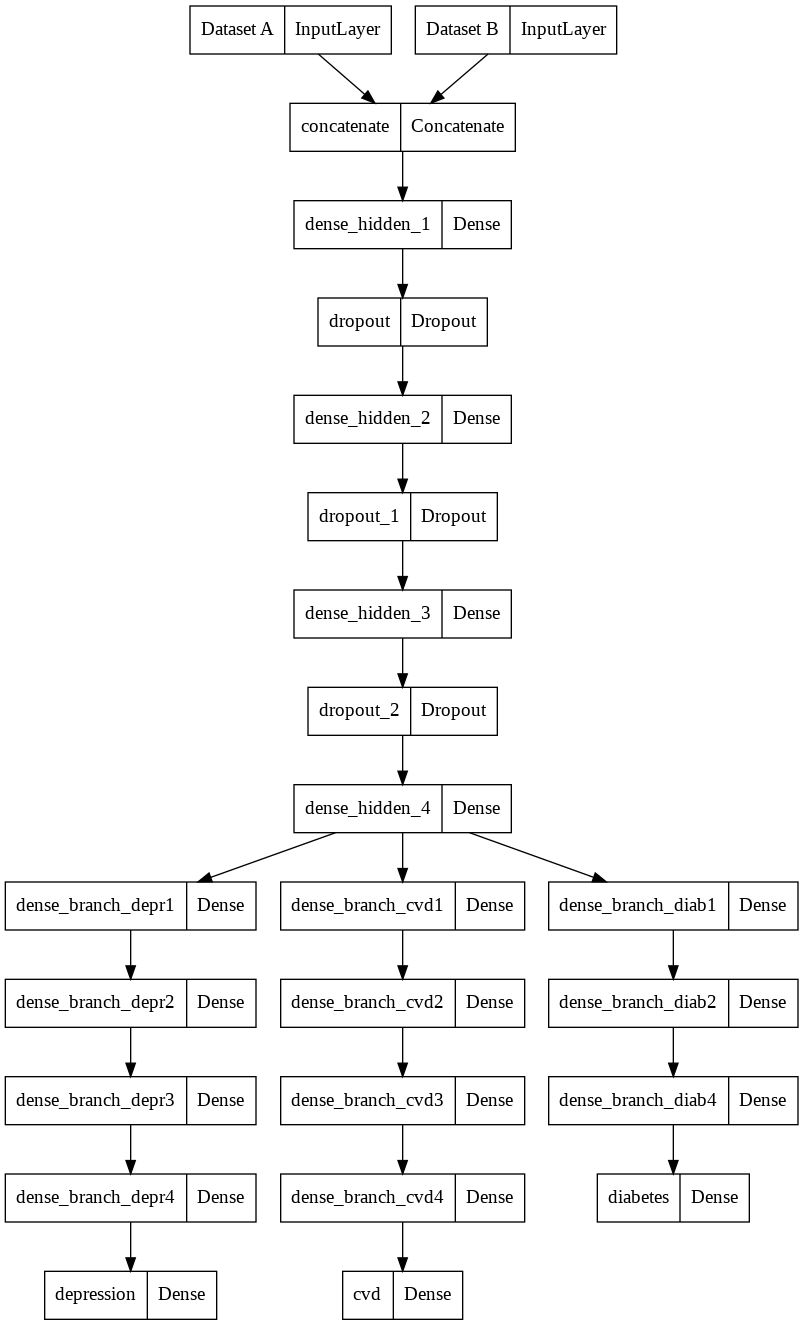

In [ ]:
tf.keras.utils.plot_model(model)

#### Experiment 4: Depression and CVD

In [ ]:
#Best feature selection

df = dfm.copy()
#df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str) +df['cvd'].astype(str)
df['all'] =  df['depression'].astype(str) +df['cvd'].astype(str)
print("all unique: ", df['all'].value_counts())
#keep rows with only single and no disease subjects
df = df.loc[(df['all'] == '10') | (df['all'] == '11') | (df['all'] == '01')]
#reset the indexes of the newly created dataframe
df.reset_index(drop=True, inplace=True)
print("all unique: ", df['all'].value_counts())
#print("shape of with single diseases: ", df.shape)

cols = df.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')
cols.remove('all')
df_X = df[cols]
df_Y = df[['all']]

# define feature selection
fs = SelectKBest(k=60).fit(df_X,df_Y)

X_selected = fs.transform(df_X)

# Get columns to keep and create new dataframe with those only
b_cols = fs.get_support(indices=True)
df_new = df_X.iloc[:,b_cols]
bestcols = df_new.columns.to_list()
scores = fs.scores_

df_new

all unique:  00    52728
10    46392
01    29536
11    28416
Name: all, dtype: int64
all unique:  10    46392
01    29536
11    28416
Name: all, dtype: int64


,sex,waistcircum,hipcircum,napduringday,sleeplessness,daytimedozing,currenttobacco,pasttobacco,oilyfishintake,processedmeat,...,weight,bodyfatpercent,whfolebodyfatmass,wholebodyfatfreemass,age,townsenddeprivation,qualification,not_working,retired,employed
0,0.0,74.0,102.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,...,70.2,35.6,25.0,45.2,57.0,0.994956,11.0,0.0,0.0,1.0
1,1.0,83.0,92.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,...,65.6,19.0,12.5,53.1,73.0,-2.845980,5.0,0.0,1.0,0.0
2,1.0,93.0,107.0,1.0,2.0,0.0,0.0,3.0,0.0,2.0,...,92.4,23.6,21.8,70.6,57.0,-2.917270,6.0,0.0,0.0,1.0
3,0.0,67.0,91.0,2.0,1.0,0.0,0.0,4.0,2.0,1.0,...,57.2,29.8,17.0,40.2,52.0,-5.797330,0.0,0.0,0.0,1.0
4,1.0,107.0,114.0,2.0,2.0,1.0,0.0,4.0,2.0,1.0,...,99.3,27.3,27.1,72.2,47.0,-3.887060,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104339,1.0,94.0,100.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0,...,82.4,20.7,17.1,65.3,58.0,-2.486890,5.0,0.0,0.0,1.0
104340,0.0,83.0,103.0,1.0,3.0,0.0,0.0,4.0,2.0,1.0,...,71.7,36.1,25.9,45.8,61.0,-2.717350,15.0,0.0,0.0,1.0
104341,1.0,80.0,101.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,72.1,16.9,12.2,59.9,45.0,-5.872370,5.0,0.0,0.0,1.0
104342,0.0,70.0,92.0,1.0,2.0,0.0,0.0,4.0,2.0,0.0,...,57.1,29.2,16.7,40.4,61.0,-0.949166,5.0,0.0,0.0,1.0


60
90
{'sex': 3715.617259427689, 'waistcircum': 4048.5771538651748, 'hipcircum': 1228.0785752796837, 'napduringday': 368.30515349139745, 'sleeplessness': 600.5699767398223, 'daytimedozing': 160.3502791436078, 'currenttobacco': 112.12534533298181, 'pasttobacco': 136.93433917990257, 'oilyfishintake': 123.18472895915542, 'processedmeat': 397.2582900495114, 'poultryintake': 127.73675363402936, 'beefintake': 358.18148099214875, 'lambintake': 328.81488516462787, 'porkintake': 353.65161313458475, 'milkused': 76.12366066914855, 'spreadtype': 153.95617097391477, 'breadintake': 349.7442490159486, 'breadtype': 159.05706228718512, 'salttofood': 97.78058889845298, 'waterintake': 198.23490225059388, 'majordietarychang': 389.62479053236217, 'variationdiet': 84.58998216415212, 'alcoholintake': 144.259408907742, 'breastfedbaby': 348.92371082886297, 'freqdepressed': 2202.357973650928, 'frequnenthusiasm2weeks': 1261.6103109597302, 'freqtensenness2weeks': 1784.4257159209578, 'freqtiredness2weeks': 1761.90

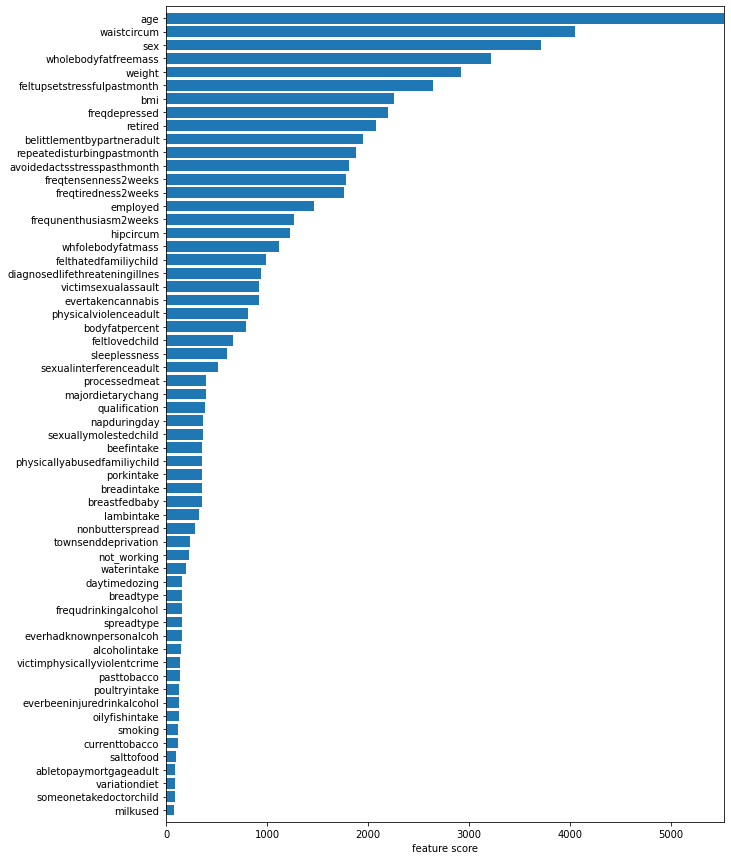

In [ ]:
li = df_X.columns.to_list()
scoresl = scores.tolist()
bestscore = []
for each in bestcols:
  bestscore.append(scoresl[li.index(each)])

print(len(bestscore))
print(len(li))
res = {}
for each in bestcols:
  res[each] = bestscore[bestcols.index(each)]
print(res)
ress = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

plt.figure(figsize=(10,15))
plt.margins(x=0, y=0.008)
plt.xlabel("feature score")
plt.barh(list(ress.keys()), list(ress.values()))
plt.show()

nB_cols:  41
nS_cols:  19
shape of dfA_:  (324932, 71)
shape of dfB_:  (90296, 27)
-----Preparing initial datasets - Train and holdout-----

Distribution of Dataset B
shape of X_trainB:  (491319, 41)
shape of y_trainB:  (491319, 2)
shape of X_testB:  (10024, 41)
shape of y_testB:  (10024, 2)

Distribution of Dataset S
shape of X_trainS:  (147610, 19)
shape of y_trainS:  (147610, 2)
shape of X_testS:  (10024, 19)
shape of y_testS:  (10024, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 37, 38, 39, 40]

Oversampling the dataset B using SMOTE-NC
Class distribution before smote:  {'00': 139072, '01': 99744, '10': 84957, '11': 69282}

Class distribution in training - Dataset B:
00    99744
01    99744
10    99744
11    99744
Name: out, dtype: int64

Preparing training data for Dataset S
Dataset B train shape:  (398976, 41)
Dataset S train shape:  (398976, 19)

Preparing tr

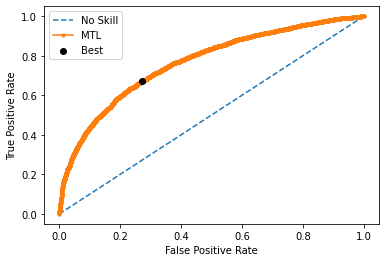

Best Threshold=0.367995, F-Score=0.717


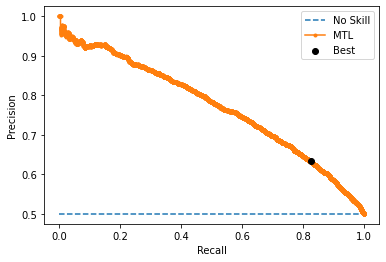

y_test value counts:
 Counter({1: 5012, 0: 5012})
y_pred value counts:  Counter({1: 6529, 0: 3495})

Confusion matrix: 
[[2619 2393]
 [ 876 4136]]
Precision:  0.6334813907183335
Sensitivity/recall:  0.825219473264166
Specificity:  0.5225458898643256
Accuracy:  0.6738826815642458
PR AUC: 0.772
f_score:  0.7167489818906507

------------------------------------------------------
cvd
------------------------------------------------------
Best Threshold=0.490516, G-Mean=0.674


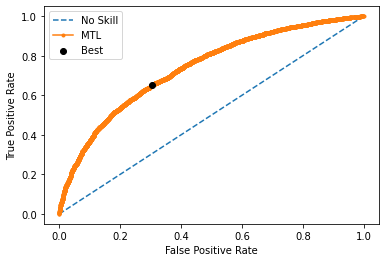

Best Threshold=0.319566, F-Score=0.709


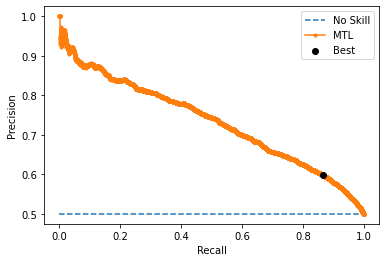

y_test value counts:
 Counter({1: 5012, 0: 5012})
y_pred value counts:  Counter({1: 7251, 0: 2773})

Confusion matrix: 
[[2107 2905]
 [ 666 4346]]
Precision:  0.5993656047441732
Sensitivity/recall:  0.8671189146049482
Specificity:  0.420391061452514
Accuracy:  0.643754988028731
PR AUC: 0.734
f_score:  0.7087988257359537


In [ ]:
#single disease single dataset - Depression and CVD

dfB_ = dfB.copy()
dfS_ = dfS.copy()
dfB_['all'] =  dfB_['depression'].astype(str) + dfB_['cvd'].astype(str)
dfS_['all'] =  dfS_['depression'].astype(str) + dfS_['cvd'].astype(str)

#keep rows with only single disease subjects
dfB_ = dfB_.loc[(dfB_['all'] == '10') | (dfB_['all'] == '01') | (dfB_['all'] == '11')]
dfS_ = dfS_.loc[(dfS_['all'] == '10') | (dfS_['all'] == '01') | (dfB_['all'] == '11')]


#keep the columns which are in bestcols 
bigcols = []
for each in dfB_.columns.to_list():
  if each in bestcols:
    bigcols.append(each)

smallcols = []
for each in dfS_.columns.to_list():
  if each in bestcols:
    smallcols.append(each)

nB_cols = len(bigcols)
nS_cols = len(smallcols)
print("nB_cols: ", nB_cols)
print("nS_cols: ", nS_cols)

#reset the indexes of the newly created dataframes
dfB_.reset_index(drop=True, inplace=True)
dfS_.reset_index(drop=True, inplace=True)

print("shape of dfA_: ", dfB_.shape)
print("shape of dfB_: ", dfS_.shape)


print("-----Preparing initial datasets - Train and holdout-----")
cols = dfB_.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

df_XB = dfB[bigcols]
df_YB = dfB[['depression', 'cvd']]

colsS = dfS.columns.tolist()
colsS.remove('diabetes')
colsS.remove('depression')
colsS.remove('cvd')

df_XS = dfS[smallcols]
df_YS = dfS[['depression', 'cvd']]


#prepare train and test dataset manually from the bigger dataset
test_size  = int(df_XB.shape[0] * 0.02)
df1 = df_YB.copy()
df1['out'] = df1['depression'].astype(str) + df1['cvd'].astype(str)
dis_cols  = df1['out'].unique().tolist()
rowsfortestB = []
for each in dis_cols:
  tempY = df1[df1.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestB.append(rows)

rowsfortestB = [j for i in rowsfortestB for j in i]
X_testB = df_XB.loc[rowsfortestB]
y_testB = df_YB.loc[rowsfortestB]
X_trainB = df_XB.loc[~df_XB.index.isin(rowsfortestB)]
y_trainB= df_YB.loc[~df_YB.index.isin(rowsfortestB)]

print("\nDistribution of Dataset B")
print("shape of X_trainB: ", X_trainB.shape)
print("shape of y_trainB: ", y_trainB.shape)
print("shape of X_testB: ", X_testB.shape)
print("shape of y_testB: ", y_testB.shape)

#prepare train and test dataset manually from the small dataset
df1S = df_YS.copy()
df1S['out'] = df1S['depression'].astype(str) +df1S['cvd'].astype(str)

rowsfortestS = []
for each in dis_cols:
  tempY = df1S[df1S.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestS.append(rows)

rowsfortestS = [j for i in rowsfortestS for j in i]
X_testS = df_XS.loc[rowsfortestS]
y_testS = df_YS.loc[rowsfortestS]
X_trainS = df_XS.loc[~df_XS.index.isin(rowsfortestS)]
y_trainS = df_YS.loc[~df_YS.index.isin(rowsfortestS)]

print("\nDistribution of Dataset S")
print("shape of X_trainS: ", X_trainS.shape)
print("shape of y_trainS: ", y_trainS.shape)
print("shape of X_testS: ", X_testS.shape)
print("shape of y_testS: ", y_testS.shape)


#get indices of categorical features

#Dataset S
cols = X_trainS.columns.tolist()
categorical_featS = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featS.append(cols.index(each))
print(categorical_featS)

#Datset B
cols = X_trainB.columns.tolist()
categorical_featB = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featB.append(cols.index(each))
print(categorical_featB)


#for smaller dataset
# perform a scaler transform on train and test dataset
trans = StandardScaler()
trans.fit(X_trainB)

data1 = trans.transform(X_trainB)
X_trainB = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans.transform(X_testB)
X_testB = pd.DataFrame(data2)

#for smaller dataset
# perform a scaler transform on train and test dataset
trans1 = StandardScaler()
trans1.fit(X_trainS)

data1 = trans1.transform(X_trainS)
X_trainS = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans1.transform(X_testS)
X_testS = pd.DataFrame(data2)


# Model configuration
batch_size = 500
no_epochs = 5
verbosity = 1
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=2, random_state=36851234)

# K-fold Cross Validation model evaluation
fold_no = 1

inputs = X_trainB.copy()
targets = y_trainB.copy()


# Define the layers of the model
input_A = Input(shape = (nB_cols,), name = 'Dataset A')
input_B = Input(shape = (nS_cols,), name = 'Dataset B')
out = Concatenate()([input_A, input_B])
dense_hidden_1 = Dense(55, activation = 'relu', name = 'dense_hidden_1')(out)
dense_hidden_1_d = Dropout(0.5)(dense_hidden_1)
dense_hidden_2 = Dense(50, activation = 'relu', name = 'dense_hidden_2')(dense_hidden_1_d)
dense_hidden_2_d = Dropout(0.25)(dense_hidden_2)
dense_hidden_3 = Dense(45, activation = 'relu', name = 'dense_hidden_3')(dense_hidden_2_d)
dense_hidden_3_d = Dropout(0.1)(dense_hidden_3)
dense_hidden_4 = Dense(40, activation = 'relu', name = 'dense_hidden_4')(dense_hidden_3_d)


dense_branch_diab1 = Dense(35, activation = 'relu', name = 'dense_branch_diab1')(dense_hidden_4)
#dense_hidden_diab1_d = Dropout(0.25)(dense_branch_diab1)
dense_branch_diab2 = Dense(30, activation = 'relu', name = 'dense_branch_diab2')(dense_branch_diab1)
dense_branch_diab3 = Dense(25, activation = 'relu', name = 'dense_branch_diab3')(dense_branch_diab2)
dense_branch_diab4 = Dense(20, activation = 'relu', name = 'dense_branch_diab4')(dense_branch_diab2)
diabetes = Dense(1, activation = 'sigmoid', name = 'diabetes')(dense_branch_diab4)


dense_branch_depr1 = Dense(35, activation = 'relu', name = 'dense_branch_depr1')(dense_hidden_4)
#dense_hidden_depr1_d = Dropout(0.1)(dense_branch_depr1)
dense_branch_depr2 = Dense(30, activation = 'relu', name = 'dense_branch_depr2')(dense_branch_depr1)
dense_branch_depr3 = Dense(25, activation = 'relu', name = 'dense_branch_depr3')(dense_branch_depr2)
dense_branch_depr4 = Dense(20, activation = 'relu', name = 'dense_branch_depr4')(dense_branch_depr3)
depression = Dense(1, activation = 'sigmoid', name ='depression')(dense_branch_depr4)

dense_branch_cvd1 = Dense(35, activation = 'relu', name = 'dense_branch_cvd1')(dense_hidden_4)
#dense_hidden_cvd1_d = Dropout(0.25)(dense_branch_cvd1)
dense_branch_cvd2 = Dense(30, activation = 'relu', name = 'dense_branch_cvd2')(dense_branch_cvd1)
dense_branch_cvd3 = Dense(25, activation = 'relu', name = 'dense_branch_cvd3')(dense_branch_cvd2)
dense_branch_cvd4 = Dense(20, activation = 'relu', name = 'dense_branch_cvd4')(dense_branch_cvd3)
cvd = Dense(1, activation = 'sigmoid', name ='cvd')(dense_branch_cvd4)

for train, test in kfold.split(inputs, targets['cvd']):

  trainX = inputs.iloc[train]
  trainy = targets.iloc[train]
  testXB = inputs.iloc[test]
  testyB = targets.iloc[test]
  #print("shape of trainX: ", trainX.shape)
  #print("trainy orig unique: \n", trainy.value_counts())
  
  # split the small dataset into train and validation
  X_train_s, X_tests, y_train_s, y_tests = train_test_split(X_trainS, y_trainS, test_size=0.20,  stratify=y_trainS['cvd'])
  

  #merge the target columns for undersampling
  df1 = trainy.copy()
  df1['out'] = df1['depression'].astype(str) +df1['cvd'].astype(str)

  #drop some 00 rows
  orig_count = df1['out'].value_counts().to_dict()
  orig_count['00'] = 0
  all_values = orig_count.values()
  orig_count['00'] = int(max(all_values))
  #orig_count['011'] = int(orig_count['011']*0.60)
  #print("orig_count after: ", orig_count)
  # define the undersampling method
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = orig_count)
  trainy = df1['out']
  df_US_X, df_US_y = undersample.fit_resample(trainX, trainy)

  print("\nOversampling the dataset B using SMOTE-NC")
  #oversample the dataset
  samp_count = df1['out'].value_counts().to_dict()
  print("Class distribution before smote: ", samp_count)
  #samp_count['100'] = int(samp_count['000']/2)
  #samp_count['110'] = int(samp_count['000']/2)
  oversample = SMOTENC(categorical_features=categorical_featB)
  df_OS_X, df_OS_y = oversample.fit_resample(df_US_X, df_US_y)


  #split the 'out column to 3 target diseases 
  a = pd.DataFrame(df_OS_y)
  a.columns = ['out']
  print("\nClass distribution in training - Dataset B:")
  print(a['out'].value_counts())
  #print("['out'] count after SMOTE: \n",a['out'].value_counts())
  a['depression'] = a['out'].str[:1]
  a['cvd'] = a['out'].str[1:2]
  

  #convert datatype of target columns to int
  a['depression'] = a['depression'].astype(str).astype(int)
  a['cvd'] = a['cvd'].astype(str).astype(int)
  
  trainXB = df_OS_X.copy()
  trainyB = a.copy()



  #create input_S dataset for training
  print("\nPreparing training data for Dataset S")
  m = trainXB.shape[0]
  yb = trainyB.copy()
  yb['all'] = yb['depression'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_train_s.copy()
  S_y['all'] = S_y['depression'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['depression', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_train_s.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_train_s, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['depression', 'cvd','newind'], axis = 1)
  trainXS = X_res.copy()

  print("Dataset B train shape: ", trainXB.shape)
  print("Dataset S train shape: ", trainXS.shape)

  #create input_S dataset for validation
  print("\nPreparing training data for Dataset S")
  m = testXB.shape[0]
  yb = testyB.copy()
  yb['all'] = yb['depression'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_tests.copy()
  S_y['all'] = S_y['depression'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['depression', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_tests.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_tests, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['depression', 'cvd','newind'], axis = 1)
  testXS = X_res.copy()
  

  print("Dataset B validation shape: ", testXB.shape)
  print("Dataset S validation shape: ", testXS.shape)

  model = tf.keras.models.Model([input_A, input_B], [depression, cvd])

  initial_learning_rate = 0.1
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=10000,
      decay_rate=0.96,
      staircase=True)
  optimizersgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
  optimizeradam = tf.keras.optimizers.Adam(lr=0.0001)

  model.compile(
      loss={
          'depression': 'binary_crossentropy',
          'cvd': 'binary_crossentropy'
      },
      optimizer = optimizeradam,
      metrics = ['accuracy']
  )  
    
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  #print("len(df_OS_X): ", len(df_OS_X))
  #print("len(testX): ", len(testX))


  # Fit data to model
  history = model.fit([trainXB, trainXS], [trainyB['depression'],trainyB['cvd']],
            validation_data = ([testXB, testXS], [testyB['depression'], testyB['cvd']]),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1)

  # Generate generalization metrics
  scores = model.evaluate([testXB, testXS], [testyB['depression'], testyB['cvd']], verbose=0)

#  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# acc_per_fold.append(scores[1] * 100)
#  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

'''
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
'''

#sort both test datasets to align target disease columns
y_testB.reset_index(drop=True, inplace=True)
X_testB.reset_index(drop=True, inplace=True)
y_testB['all'] = y_testB['depression'].astype(str) +y_testB['cvd'].astype(str) 

#create a dataframe for target variables of test B
all_testXB = pd.concat([X_testB, y_testB['all']], axis=1, join="inner")
all_testXB.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXB['all'].copy()
all_testXB = all_testXB.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset B:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['depression'] = a['all'].str[:1]
a['cvd'] = a['all'].str[1:2]
all_testyB = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyB['depression'] = all_testyB['depression'].astype(str).astype(int)
all_testyB['cvd'] = all_testyB['cvd'].astype(str).astype(int)


y_testS.reset_index(drop=True, inplace=True)
X_testS.reset_index(drop=True, inplace=True)
y_testS['all'] = y_testS['depression'].astype(str) +y_testS['cvd'].astype(str) 
#create a dataframe for target variables of test S
all_testXS = pd.concat([X_testS, y_testS['all']], axis=1, join="inner")
all_testXS.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXS['all'].copy()
all_testXS = all_testXS.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset S:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['depression'] = a['all'].str[:1]
a['cvd'] = a['all'].str[1:2]
all_testyS = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyS['depression'] = all_testyS['depression'].astype(str).astype(int)
all_testyS['cvd'] = all_testyS['cvd'].astype(str).astype(int)



preds = model.predict([all_testXB, all_testXS])
# Metrics for each target disease
target_v = ['depression', 'cvd']

pred_threshold = {}

for each in target_v:
  print("\n------------------------------------------------------")
  print(each)
  print("------------------------------------------------------")

  #preds = model.predict(X_test)
  y_true = all_testyB[each]
  predictions = preds[target_v.index(each)]

  lr_probs = predictions

  fpr, tpr, thresholds = roc_curve(y_true, lr_probs)
  # calculate the g-mean for each threshold
  gmeans = np.sqrt(tpr * (1-fpr))
  # locate the index of the largest g-mean
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  # plot the roc curve for the model
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(fpr, tpr, marker='.', label='MTL',  zorder=-1)
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()

  # calculate precision and recall for each threshold
  lr_precision, lr_recall, thresholds = precision_recall_curve(y_true, lr_probs)
  # convert to f score
  fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  # calculate scores
  #lr_f1, lr_auc = f1_score(y_over, y_pred), auc(lr_recall, lr_precision)
  # summarize scores
  #print('NN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the roc curve for the model
  no_skill = len(y_true[y_true==1]) / len(y_true)
  pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(lr_recall, lr_precision, marker='.', label='MTL', zorder=-1)
  pyplot.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  pyplot.legend()
  # show the plot
  pyplot.show()
  
  pred_threshold[each] = thresholds[ix]

  y_pred = [1 * (x[0]>thresholds[ix]) for x in predictions]
  
  matrix = confusion_matrix(y_true, y_pred)
  print("y_test value counts:\n",Counter(y_true))
  print("y_pred value counts: ", Counter(y_pred))
  print("\nConfusion matrix: ")
  print(matrix)

  tn, fp, fn, tp = matrix.ravel()
  recall = tp/(tp+fn)
  precision = tp/(fp+tp)
  specifcity = tn/(fp+tn)
  acc = (tn+tp)/(tn+fp+fn+tp)
  auc_score = auc(lr_recall, lr_precision)
  print("Precision: ", precision)
  print("Sensitivity/recall: ", recall)
  print("Specificity: ", specifcity)
  print("Accuracy: ", acc)
  print('PR AUC: %.3f' % auc_score)

  f_score = f1_score(y_true, y_pred)
  print("f_score: ", f_score)



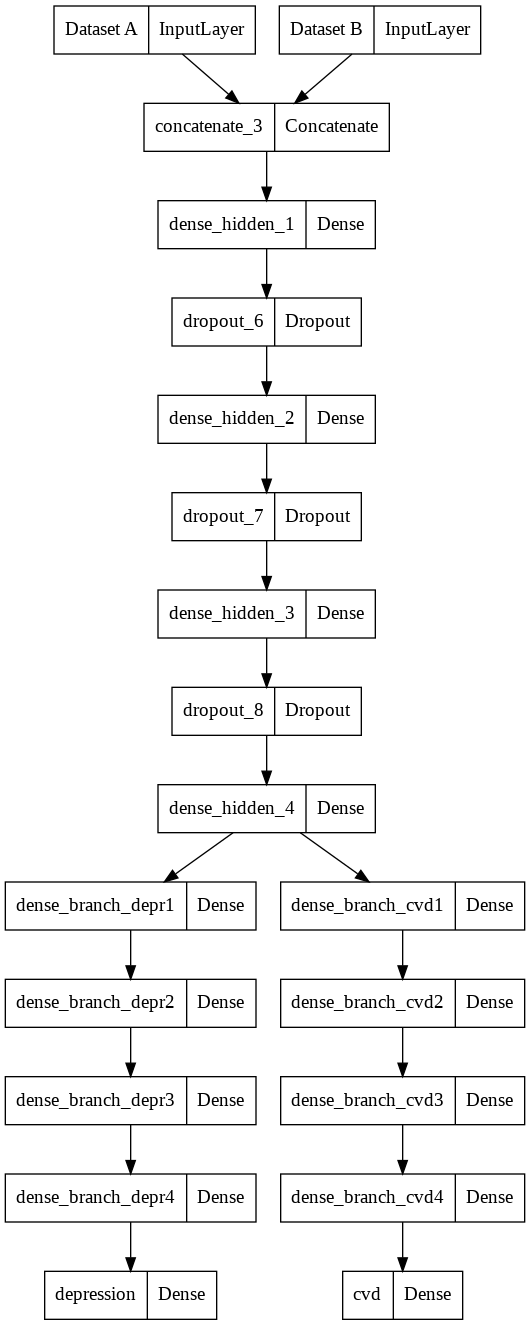

In [ ]:
tf.keras.utils.plot_model(model)

#### Experiment 2: Diabetes and Depression

In [ ]:
#Best feature selection

df = dfm.copy()
#df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str) +df['cvd'].astype(str)
df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str)
print("all unique: ", df['all'].value_counts())
#keep rows with only single and no disease subjects
df = df.loc[(df['all'] == '01') | (df['all'] == '10') | (df['all'] == '11')]
#reset the indexes of the newly created dataframe
df.reset_index(drop=True, inplace=True)
print("all unique: ", df['all'].value_counts())
#print("shape of with single diseases: ", df.shape)

cols = df.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')
cols.remove('all')
df_X = df[cols]
df_Y = df[['all']]

# define feature selection
fs = SelectKBest(k=60).fit(df_X,df_Y)

X_selected = fs.transform(df_X)

# Get columns to keep and create new dataframe with those only
b_cols = fs.get_support(indices=True)
df_new = df_X.iloc[:,b_cols]
bestcols = df_new.columns.to_list()
scores = fs.scores_
df_new

all unique:  00    79016
01    71625
10     3248
11     3183
Name: all, dtype: int64
all unique:  01    71625
10     3248
11     3183
Name: all, dtype: int64


,sex,waistcircum,hipcircum,napduringday,sleeplessness,daytimedozing,pasttobacco,saladintake,processedmeat,poultryintake,...,age,townsenddeprivation,summedMETminutes,qualification,not_working,retired,employed,White,AsianorAsianBritish,BlackorBlackBritish
0,0.0,74.0,102.0,2.0,3.0,0.0,1.0,10.0,1.0,2.0,...,57.0,0.994956,1235.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,93.0,107.0,1.0,2.0,0.0,3.0,1.0,2.0,3.0,...,57.0,-2.917270,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,67.0,91.0,2.0,1.0,0.0,4.0,5.0,1.0,2.0,...,52.0,-5.797330,9492.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,107.0,114.0,2.0,2.0,1.0,4.0,0.0,1.0,4.0,...,47.0,-3.887060,808.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,87.0,100.0,2.0,1.0,0.0,1.0,8.0,1.0,1.0,...,54.0,5.205470,1502.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78051,0.0,86.0,109.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,...,73.0,-1.529220,1653.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0
78052,1.0,80.0,93.0,1.0,2.0,0.0,4.0,2.0,2.0,3.0,...,58.0,-2.678570,412.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0
78053,1.0,94.0,100.0,2.0,1.0,0.0,4.0,1.0,1.0,3.0,...,58.0,-2.486890,7518.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0
78054,1.0,80.0,101.0,1.0,1.0,0.0,2.0,1.0,2.0,3.0,...,45.0,-5.872370,4170.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0


60
90
{'sex': 1142.2895744211762, 'waistcircum': 3215.4228395016025, 'hipcircum': 1082.242119229695, 'napduringday': 284.6574463648109, 'sleeplessness': 77.52995402393971, 'daytimedozing': 130.50392569351104, 'pasttobacco': 57.3191068437596, 'saladintake': 27.765218775342028, 'processedmeat': 213.8713523527256, 'poultryintake': 28.06960832221481, 'beefintake': 125.58490326677041, 'lambintake': 93.84695225478411, 'porkintake': 119.22503911650546, 'cheeseintake': 37.327003742048255, 'spreadtype': 103.21485235683612, 'breadintake': 283.04377164213275, 'breadtype': 46.207648220016395, 'cerealtype': 36.20147330814035, 'majordietarychang': 578.5218394599339, 'alcoholintake': 182.98540013413117, 'breastfedbaby': 59.08287622620581, 'freqdepressed': 290.98484025301957, 'frequnenthusiasm2weeks': 183.25741169493887, 'freqtensenness2weeks': 229.8954194088812, 'freqtiredness2weeks': 244.4112479735693, 'nonbutterspread': 55.39482595477783, 'smoking': 31.22819207885737, 'alcoholdrinkerstatus': 54.918

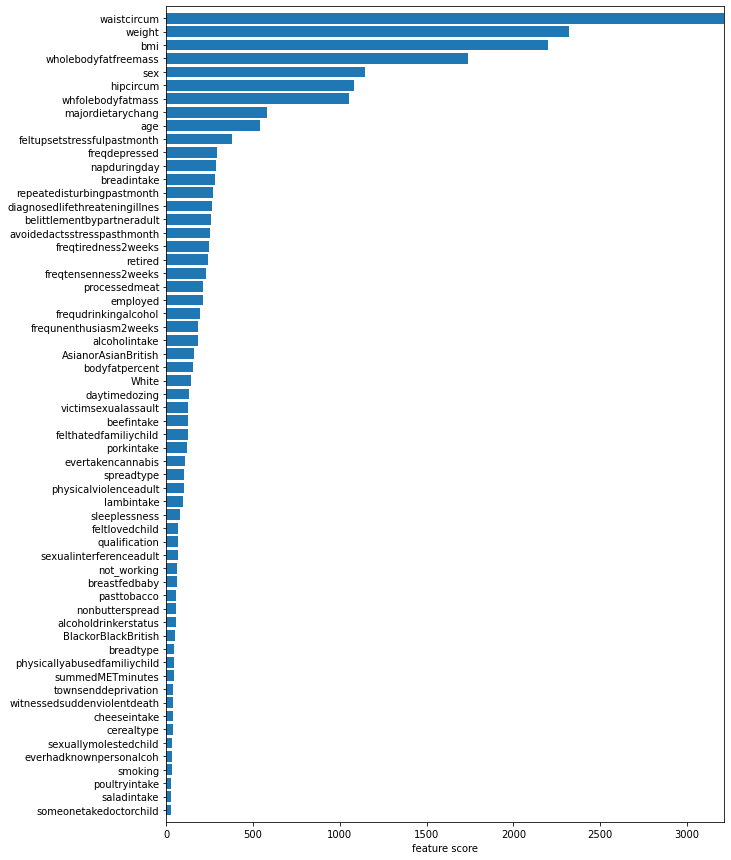

In [ ]:
li = df_X.columns.to_list()
scoresl = scores.tolist()
bestscore = []
for each in bestcols:
  bestscore.append(scoresl[li.index(each)])

print(len(bestscore))
print(len(li))
res = {}
for each in bestcols:
  res[each] = bestscore[bestcols.index(each)]
print(res)
ress = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

plt.figure(figsize=(10,15))
plt.margins(x=0, y=0.008)
plt.xlabel("feature score")
plt.barh(list(ress.keys()), list(ress.values()))
plt.show()

nB_cols:  43
nS_cols:  17
shape of dfA_:  (214778, 71)
shape of dfB_:  (76788, 27)
-----Preparing initial datasets - Train and holdout-----

Distribution of Dataset B
shape of X_trainB:  (491654, 43)
shape of y_trainB:  (491654, 2)
shape of X_testB:  (10024, 43)
shape of y_testB:  (10024, 2)

Distribution of Dataset S
shape of X_trainS:  (148923, 17)
shape of y_trainS:  (148923, 2)
shape of X_testS:  (10024, 17)
shape of y_testS:  (10024, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 42]

Oversampling the dataset B using SMOTE-NC
Class distribution before smote:  {'00': 227249, '01': 146566, '10': 11950, '11': 7558}

Class distribution in training - Dataset B:
01    227249
00    227249
11    227249
10    227249
Name: out, dtype: int64

Preparing training data for Dataset S
Dataset B train shape:  (908996, 43)
Dataset S train shape:  (908996, 17)

Preparing t

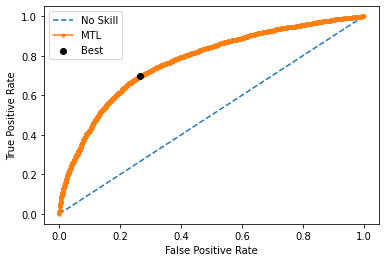

Best Threshold=0.194251, F-Score=0.724


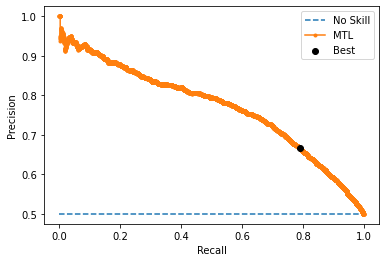

y_test value counts:
 Counter({0: 5012, 1: 5012})
y_pred value counts:  Counter({1: 5946, 0: 4078})

Confusion matrix: 
[[3030 1982]
 [1048 3964]]
Precision:  0.6666666666666666
Sensitivity/recall:  0.790901835594573
Specificity:  0.6045490822027135
Accuracy:  0.6977254588986432
PR AUC: 0.771
f_score:  0.7234896878992517

------------------------------------------------------
depression
------------------------------------------------------
Best Threshold=0.513170, G-Mean=0.710


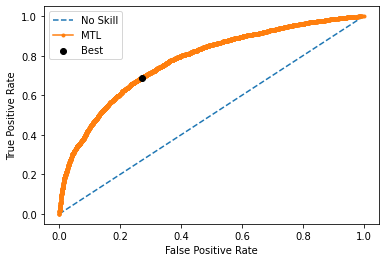

Best Threshold=0.360405, F-Score=0.728


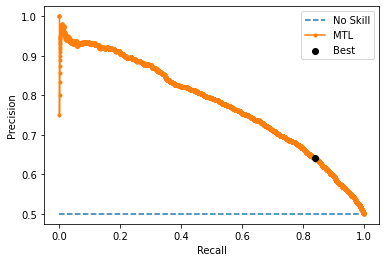

y_test value counts:
 Counter({1: 5012, 0: 5012})
y_pred value counts:  Counter({1: 6582, 0: 3442})

Confusion matrix: 
[[2647 2365]
 [ 795 4217]]
Precision:  0.6406867213612883
Sensitivity/recall:  0.8413806863527534
Specificity:  0.5281324820430966
Accuracy:  0.684756584197925
PR AUC: 0.779
f_score:  0.72744523029153


In [ ]:
#single disease single dataset - Diabetes and Depression

dfB_ = dfB.copy()
dfS_ = dfS.copy()
dfB_['all'] =  dfB_['diabetes'].astype(str) + dfB_['depression'].astype(str)
dfS_['all'] =  dfS_['diabetes'].astype(str) + dfS_['depression'].astype(str)

#keep rows with only single disease subjects
dfB_ = dfB_.loc[(dfB_['all'] == '10') | (dfB_['all'] == '01') | (dfB_['all'] == '11')]
dfS_ = dfS_.loc[(dfS_['all'] == '10') | (dfS_['all'] == '01') | (dfB_['all'] == '11')]


#keep the columns which are in bestcols 
bigcols = []
for each in dfB_.columns.to_list():
  if each in bestcols:
    bigcols.append(each)

smallcols = []
for each in dfS_.columns.to_list():
  if each in bestcols:
    smallcols.append(each)

nB_cols = len(bigcols)
nS_cols = len(smallcols)
print("nB_cols: ", nB_cols)
print("nS_cols: ", nS_cols)

#reset the indexes of the newly created dataframes
dfB_.reset_index(drop=True, inplace=True)
dfS_.reset_index(drop=True, inplace=True)

print("shape of dfA_: ", dfB_.shape)
print("shape of dfB_: ", dfS_.shape)


print("-----Preparing initial datasets - Train and holdout-----")
cols = dfB_.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

df_XB = dfB[bigcols]
df_YB = dfB[['diabetes', 'depression']]

colsS = dfS.columns.tolist()
colsS.remove('diabetes')
colsS.remove('depression')
colsS.remove('cvd')

df_XS = dfS[smallcols]
df_YS = dfS[['diabetes', 'depression']]


#prepare train and test dataset manually from the bigger dataset
test_size  = int(df_XB.shape[0] * 0.02)
df1 = df_YB.copy()
df1['out'] = df1['diabetes'].astype(str) + df1['depression'].astype(str)
dis_cols  = df1['out'].unique().tolist()
rowsfortestB = []
for each in dis_cols:
  tempY = df1[df1.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestB.append(rows)

rowsfortestB = [j for i in rowsfortestB for j in i]
X_testB = df_XB.loc[rowsfortestB]
y_testB = df_YB.loc[rowsfortestB]
X_trainB = df_XB.loc[~df_XB.index.isin(rowsfortestB)]
y_trainB= df_YB.loc[~df_YB.index.isin(rowsfortestB)]

print("\nDistribution of Dataset B")
print("shape of X_trainB: ", X_trainB.shape)
print("shape of y_trainB: ", y_trainB.shape)
print("shape of X_testB: ", X_testB.shape)
print("shape of y_testB: ", y_testB.shape)

#prepare train and test dataset manually from the small dataset
df1S = df_YS.copy()
df1S['out'] = df1S['diabetes'].astype(str) +df1S['depression'].astype(str)

rowsfortestS = []
for each in dis_cols:
  tempY = df1S[df1S.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestS.append(rows)

rowsfortestS = [j for i in rowsfortestS for j in i]
X_testS = df_XS.loc[rowsfortestS]
y_testS = df_YS.loc[rowsfortestS]
X_trainS = df_XS.loc[~df_XS.index.isin(rowsfortestS)]
y_trainS = df_YS.loc[~df_YS.index.isin(rowsfortestS)]

print("\nDistribution of Dataset S")
print("shape of X_trainS: ", X_trainS.shape)
print("shape of y_trainS: ", y_trainS.shape)
print("shape of X_testS: ", X_testS.shape)
print("shape of y_testS: ", y_testS.shape)


#get indices of categorical features

#Dataset S
cols = X_trainS.columns.tolist()
categorical_featS = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featS.append(cols.index(each))
print(categorical_featS)

#Datset B
cols = X_trainB.columns.tolist()
categorical_featB = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featB.append(cols.index(each))
print(categorical_featB)


#for smaller dataset
# perform a scaler transform on train and test dataset
trans = StandardScaler()
trans.fit(X_trainB)

data1 = trans.transform(X_trainB)
X_trainB = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans.transform(X_testB)
X_testB = pd.DataFrame(data2)

#for smaller dataset
# perform a scaler transform on train and test dataset
trans1 = StandardScaler()
trans1.fit(X_trainS)

data1 = trans1.transform(X_trainS)
X_trainS = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans1.transform(X_testS)
X_testS = pd.DataFrame(data2)


# Model configuration
batch_size = 500
no_epochs = 5
verbosity = 1
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=2, random_state=36851234)

# K-fold Cross Validation model evaluation
fold_no = 1

inputs = X_trainB.copy()
targets = y_trainB.copy()


# Define the layers of the model
input_A = Input(shape = (nB_cols,), name = 'Dataset A')
input_B = Input(shape = (nS_cols,), name = 'Dataset B')
out = Concatenate()([input_A, input_B])
dense_hidden_1 = Dense(55, activation = 'relu', name = 'dense_hidden_1')(out)
dense_hidden_1_d = Dropout(0.5)(dense_hidden_1)
dense_hidden_2 = Dense(50, activation = 'relu', name = 'dense_hidden_2')(dense_hidden_1_d)
dense_hidden_2_d = Dropout(0.25)(dense_hidden_2)
dense_hidden_3 = Dense(45, activation = 'relu', name = 'dense_hidden_3')(dense_hidden_2_d)
dense_hidden_3_d = Dropout(0.1)(dense_hidden_3)
dense_hidden_4 = Dense(40, activation = 'relu', name = 'dense_hidden_4')(dense_hidden_3_d)


dense_branch_diab1 = Dense(35, activation = 'relu', name = 'dense_branch_diab1')(dense_hidden_4)
#dense_hidden_diab1_d = Dropout(0.25)(dense_branch_diab1)
dense_branch_diab2 = Dense(30, activation = 'relu', name = 'dense_branch_diab2')(dense_branch_diab1)
dense_branch_diab3 = Dense(25, activation = 'relu', name = 'dense_branch_diab3')(dense_branch_diab2)
dense_branch_diab4 = Dense(20, activation = 'relu', name = 'dense_branch_diab4')(dense_branch_diab2)
diabetes = Dense(1, activation = 'sigmoid', name = 'diabetes')(dense_branch_diab4)


dense_branch_depr1 = Dense(35, activation = 'relu', name = 'dense_branch_depr1')(dense_hidden_4)
#dense_hidden_depr1_d = Dropout(0.1)(dense_branch_depr1)
dense_branch_depr2 = Dense(30, activation = 'relu', name = 'dense_branch_depr2')(dense_branch_depr1)
dense_branch_depr3 = Dense(25, activation = 'relu', name = 'dense_branch_depr3')(dense_branch_depr2)
dense_branch_depr4 = Dense(20, activation = 'relu', name = 'dense_branch_depr4')(dense_branch_depr3)
depression = Dense(1, activation = 'sigmoid', name ='depression')(dense_branch_depr4)

dense_branch_cvd1 = Dense(35, activation = 'relu', name = 'dense_branch_cvd1')(dense_hidden_4)
#dense_hidden_cvd1_d = Dropout(0.25)(dense_branch_cvd1)
dense_branch_cvd2 = Dense(30, activation = 'relu', name = 'dense_branch_cvd2')(dense_branch_cvd1)
dense_branch_cvd3 = Dense(25, activation = 'relu', name = 'dense_branch_cvd3')(dense_branch_cvd2)
dense_branch_cvd4 = Dense(20, activation = 'relu', name = 'dense_branch_cvd4')(dense_branch_cvd3)
cvd = Dense(1, activation = 'sigmoid', name ='cvd')(dense_branch_cvd4)

for train, test in kfold.split(inputs, targets['diabetes']):

  trainX = inputs.iloc[train]
  trainy = targets.iloc[train]
  testXB = inputs.iloc[test]
  testyB = targets.iloc[test]
  #print("shape of trainX: ", trainX.shape)
  #print("trainy orig unique: \n", trainy.value_counts())
  
  # split the small dataset into train and validation
  X_train_s, X_tests, y_train_s, y_tests = train_test_split(X_trainS, y_trainS, test_size=0.20,  stratify=y_trainS['diabetes'])
  

  #merge the target columns for undersampling
  df1 = trainy.copy()
  df1['out'] = df1['diabetes'].astype(str) +df1['depression'].astype(str)

  print("\nOversampling the dataset B using SMOTE-NC")
  #oversample the dataset
  samp_count = df1['out'].value_counts().to_dict()
  print("Class distribution before smote: ", samp_count)
  #samp_count['100'] = int(samp_count['000']/2)
  #samp_count['110'] = int(samp_count['000']/2)
  oversample = SMOTENC(categorical_features=categorical_featB)
  df_OS_X, df_OS_y = oversample.fit_resample(trainX, df1['out'])


  #split the 'out column to 3 target diseases 
  a = pd.DataFrame(df_OS_y)
  a.columns = ['out']
  print("\nClass distribution in training - Dataset B:")
  print(a['out'].value_counts())
  #print("['out'] count after SMOTE: \n",a['out'].value_counts())
  a['diabetes'] = a['out'].str[:1]
  a['depression'] = a['out'].str[1:2]
  

  #convert datatype of target columns to int
  a['diabetes'] = a['diabetes'].astype(str).astype(int)
  a['depression'] = a['depression'].astype(str).astype(int)
  a.drop(['out'], axis = 1)
  trainXB = df_OS_X.copy()
  trainyB = a.copy()



  #create input_S dataset for training
  print("\nPreparing training data for Dataset S")
  m = trainXB.shape[0]
  yb = trainyB.copy()
  yb['all'] = yb['diabetes'].astype(str) +yb['depression'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_train_s.copy()
  S_y['all'] = S_y['diabetes'].astype(str) +S_y['depression'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'depression']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_train_s.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_train_s, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'depression','newind'], axis = 1)
  trainXS = X_res.copy()

  print("Dataset B train shape: ", trainXB.shape)
  print("Dataset S train shape: ", trainXS.shape)

  #create input_S dataset for validation
  print("\nPreparing training data for Dataset S")
  m = testXB.shape[0]
  yb = testyB.copy()
  yb['all'] = yb['diabetes'].astype(str) +yb['depression'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_tests.copy()
  S_y['all'] = S_y['diabetes'].astype(str) +S_y['depression'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'depression']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_tests.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_tests, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'depression','newind'], axis = 1)
  testXS = X_res.copy()
  

  print("Dataset B validation shape: ", testXB.shape)
  print("Dataset S validation shape: ", testXS.shape)

  model = tf.keras.models.Model([input_A, input_B], [diabetes, depression])

  initial_learning_rate = 0.1
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=10000,
      decay_rate=0.96,
      staircase=True)
  optimizersgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
  optimizeradam = tf.keras.optimizers.Adam(lr=0.0001)

  model.compile(
      loss={
          'diabetes': 'binary_crossentropy',
          'depression': 'binary_crossentropy'
      },
      optimizer = optimizeradam,
      metrics = ['accuracy']
  )  
    
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  #print("len(df_OS_X): ", len(df_OS_X))
  #print("len(testX): ", len(testX))


  # Fit data to model
  history = model.fit([trainXB, trainXS], [trainyB['diabetes'],trainyB['depression']],
            validation_data = ([testXB, testXS], [testyB['diabetes'], testyB['depression']]),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1)

  # Generate generalization metrics
  scores = model.evaluate([testXB, testXS], [testyB['diabetes'], testyB['depression']], verbose=0)

#  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# acc_per_fold.append(scores[1] * 100)
#  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

'''
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
'''

#sort both test datasets to align target disease columns
y_testB.reset_index(drop=True, inplace=True)
X_testB.reset_index(drop=True, inplace=True)
y_testB['all'] = y_testB['diabetes'].astype(str) +y_testB['depression'].astype(str) 

#create a dataframe for target variables of test B
all_testXB = pd.concat([X_testB, y_testB['all']], axis=1, join="inner")
all_testXB.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXB['all'].copy()
all_testXB = all_testXB.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset B:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['depression'] = a['all'].str[1:2]
all_testyB = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyB['diabetes'] = all_testyB['diabetes'].astype(str).astype(int)
all_testyB['depression'] = all_testyB['depression'].astype(str).astype(int)


y_testS.reset_index(drop=True, inplace=True)
X_testS.reset_index(drop=True, inplace=True)
y_testS['all'] = y_testS['diabetes'].astype(str) +y_testS['depression'].astype(str) 
#create a dataframe for target variables of test S
all_testXS = pd.concat([X_testS, y_testS['all']], axis=1, join="inner")
all_testXS.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXS['all'].copy()
all_testXS = all_testXS.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset S:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['depression'] = a['all'].str[1:2]
all_testyS = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyS['diabetes'] = all_testyS['diabetes'].astype(str).astype(int)
all_testyS['depression'] = all_testyS['depression'].astype(str).astype(int)



preds = model.predict([all_testXB, all_testXS])
# Metrics for each target disease
target_v = ['diabetes', 'depression']

pred_threshold = {}

for each in target_v:
  print("\n------------------------------------------------------")
  print(each)
  print("------------------------------------------------------")

  #preds = model.predict(X_test)
  y_true = all_testyB[each]
  predictions = preds[target_v.index(each)]

  lr_probs = predictions

  fpr, tpr, thresholds = roc_curve(y_true, lr_probs)
  # calculate the g-mean for each threshold
  gmeans = np.sqrt(tpr * (1-fpr))
  # locate the index of the largest g-mean
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  # plot the roc curve for the model
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(fpr, tpr, marker='.', label='MTL',  zorder=-1)
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()

  # calculate precision and recall for each threshold
  lr_precision, lr_recall, thresholds = precision_recall_curve(y_true, lr_probs)
  # convert to f score
  fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  # calculate scores
  #lr_f1, lr_auc = f1_score(y_over, y_pred), auc(lr_recall, lr_precision)
  # summarize scores
  #print('NN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the roc curve for the model
  no_skill = len(y_true[y_true==1]) / len(y_true)
  pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(lr_recall, lr_precision, marker='.', label='MTL', zorder=-1)
  pyplot.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  pyplot.legend()
  # show the plot
  pyplot.show()
  
  pred_threshold[each] = thresholds[ix]

  y_pred = [1 * (x[0]>thresholds[ix]) for x in predictions]
  
  matrix = confusion_matrix(y_true, y_pred)
  print("y_test value counts:\n",Counter(y_true))
  print("y_pred value counts: ", Counter(y_pred))
  print("\nConfusion matrix: ")
  print(matrix)

  tn, fp, fn, tp = matrix.ravel()
  recall = tp/(tp+fn)
  precision = tp/(fp+tp)
  specifcity = tn/(fp+tn)
  acc = (tn+tp)/(tn+fp+fn+tp)
  auc_score = auc(lr_recall, lr_precision)
  print("Precision: ", precision)
  print("Sensitivity/recall: ", recall)
  print("Specificity: ", specifcity)
  print("Accuracy: ", acc)
  print('PR AUC: %.3f' % auc_score)

  f_score = f1_score(y_true, y_pred)
  print("f_score: ", f_score)



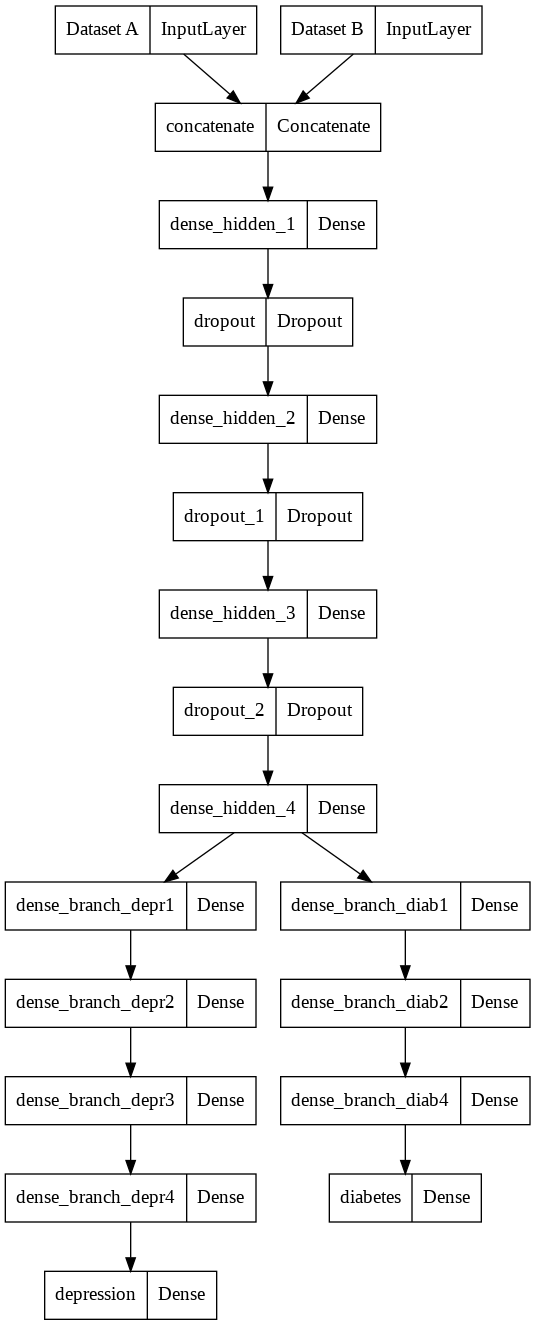

In [ ]:
tf.keras.utils.plot_model(model)

#### Experiment 2: Diabetes and CVDs

In [ ]:
#Best feature selection

df = dfm.copy()
#df['all'] =  df['diabetes'].astype(str) + df['depression'].astype(str) +df['cvd'].astype(str)
df['all'] =  df['diabetes'].astype(str) + df['cvd'].astype(str)
print("all unique: ", df['all'].value_counts())
#keep rows with only single and no disease subjects
df = df.loc[(df['all'] == '01') | (df['all'] == '10') | (df['all'] == '11')]
#reset the indexes of the newly created dataframe
df.reset_index(drop=True, inplace=True)
print("all unique: ", df['all'].value_counts())
#print("shape of with single diseases: ", df.shape)

cols = df.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')
cols.remove('all')
df_X = df[cols]
df_Y = df[['all']]

# define feature selection
fs = SelectKBest(k=60).fit(df_X,df_Y)

X_selected = fs.transform(df_X)

# Get columns to keep and create new dataframe with those only
b_cols = fs.get_support(indices=True)
df_new = df_X.iloc[:,b_cols]
bestcols = df_new.columns.to_list()
scores = fs.scores_
df_new

all unique:  00    97144
01    53497
11     4455
10     1976
Name: all, dtype: int64
all unique:  01    53497
11     4455
10     1976
Name: all, dtype: int64


,sex,waistcircum,hipcircum,napduringday,sleeplessness,daytimedozing,currenttobacco,pasttobacco,saladintake,fruitintake,...,summedMETminutes,qualification,Unemployed,not_working,retired,employed,White,AsianorAsianBritish,BlackorBlackBritish,otherEth
0,0.0,74.0,102.0,2.0,3.0,0.0,0.0,1.0,10.0,2.0,...,1235.0,11.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,83.0,92.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,...,3199.5,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,93.0,107.0,1.0,2.0,0.0,0.0,3.0,1.0,1.0,...,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,67.0,91.0,2.0,1.0,0.0,0.0,4.0,5.0,1.0,...,9492.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,107.0,114.0,2.0,2.0,1.0,0.0,4.0,0.0,0.0,...,808.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59923,1.0,111.0,113.0,2.0,3.0,1.0,0.0,4.0,1.0,2.0,...,693.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
59924,1.0,93.0,102.0,2.0,1.0,1.0,0.0,3.0,0.0,0.0,...,6330.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
59925,1.0,105.0,110.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,...,73.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
59926,0.0,83.0,103.0,1.0,3.0,0.0,0.0,4.0,6.0,3.0,...,3126.0,15.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


60
90
{'sex': 177.01643310301392, 'waistcircum': 1658.0666798974, 'hipcircum': 695.0391178825852, 'napduringday': 170.88750255534205, 'sleeplessness': 21.412565426025534, 'daytimedozing': 76.97138935149786, 'currenttobacco': 7.095095432808984, 'pasttobacco': 43.776773440529176, 'saladintake': 10.665279204508053, 'fruitintake': 8.476868266505974, 'driedfruit': 21.341508996822874, 'oilyfishintake': 9.355827024414856, 'processedmeat': 75.95171361322556, 'beefintake': 32.38883271533933, 'lambintake': 16.813930261366842, 'porkintake': 32.84153739621891, 'cheeseintake': 14.439648845997423, 'spreadtype': 38.23384659748537, 'breadintake': 114.91834295069953, 'breadtype': 15.687906390792417, 'cerealtype': 21.03231942088502, 'teaintake': 11.940316013123718, 'waterintake': 17.219911182677478, 'majordietarychang': 558.1504206216811, 'variationdiet': 25.953733857373205, 'alcoholintake': 242.59409419152755, 'adoptedaschild': 8.621444209751143, 'freqdepressed': 21.01698896121482, 'frequnenthusiasm2we

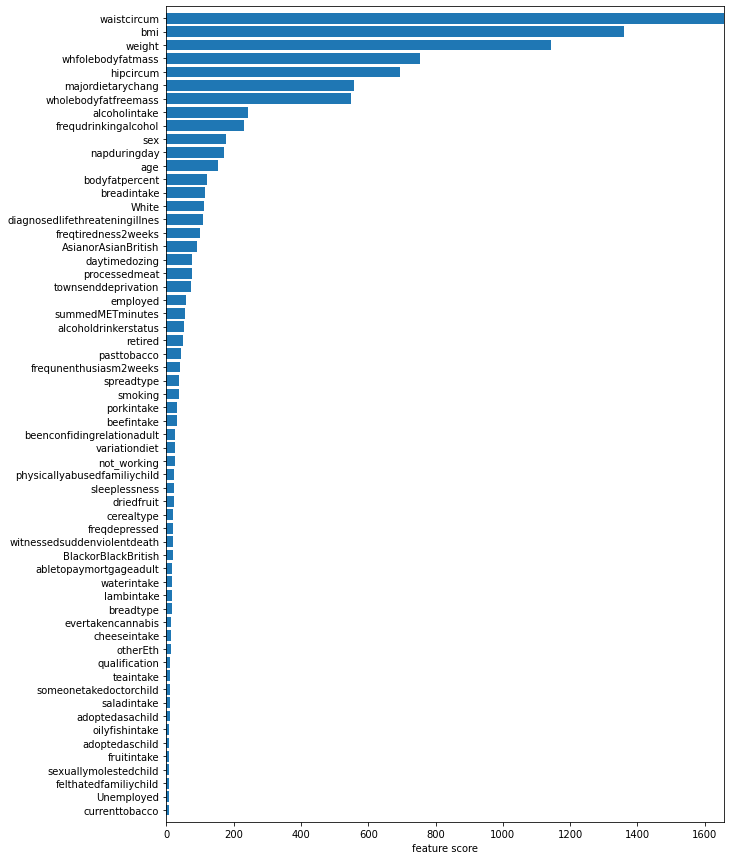

In [ ]:
li = df_X.columns.to_list()
scoresl = scores.tolist()
bestscore = []
for each in bestcols:
  bestscore.append(scoresl[li.index(each)])

print(len(bestscore))
print(len(li))
res = {}
for each in bestcols:
  res[each] = bestscore[bestcols.index(each)]
print(res)
ress = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

plt.figure(figsize=(10,15))
plt.margins(x=0, y=0.008)
plt.xlabel("feature score")
plt.barh(list(ress.keys()), list(ress.values()))
plt.show()

nB_cols:  50
nS_cols:  10
shape of dfA_:  (223195, 71)
shape of dfB_:  (59976, 27)
-----Preparing initial datasets - Train and holdout-----

Distribution of Dataset B
shape of X_trainB:  (491808, 50)
shape of y_trainB:  (491808, 2)
shape of X_testB:  (10024, 50)
shape of y_testB:  (10024, 2)

Distribution of Dataset S
shape of X_trainS:  (148985, 10)
shape of y_trainS:  (148985, 2)
shape of X_testS:  (10024, 10)
shape of y_testS:  (10024, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Oversampling the dataset B using SMOTE-NC
Class distribution before smote:  {'00': 220469, '01': 153343, '11': 15726, '10': 3908}

Class distribution in training - Dataset B:
00    153343
01    153343
10    153343
11    153343
Name: out, dtype: int64

Preparing training data for Dataset S
Dataset B train shape:  (613372, 50)
Dataset S train shape:  (613372, 10)

Preparing training data fo

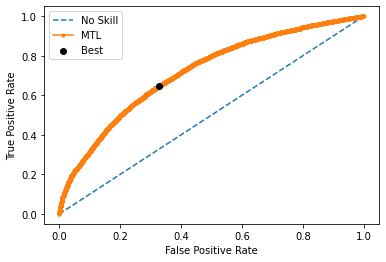

Best Threshold=0.178814, F-Score=0.701


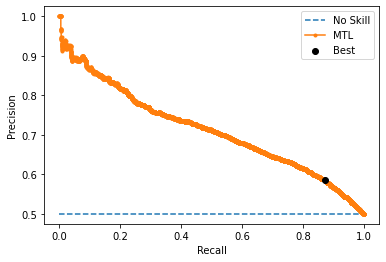

y_test value counts:
 Counter({0: 5012, 1: 5012})
y_pred value counts:  Counter({0: 5144, 1: 4880})

Confusion matrix: 
[[3377 1635]
 [1767 3245]]
Precision:  0.6649590163934426
Sensitivity/recall:  0.6474461292897047
Specificity:  0.6737829209896249
Accuracy:  0.6606145251396648
PR AUC: 0.713
f_score:  0.6560857258390618

------------------------------------------------------
cvd
------------------------------------------------------
Best Threshold=0.519898, G-Mean=0.624


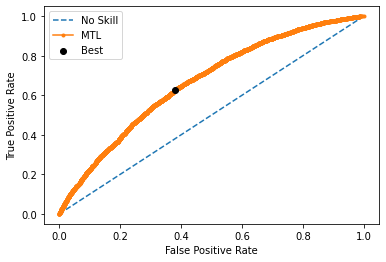

Best Threshold=0.323562, F-Score=0.687


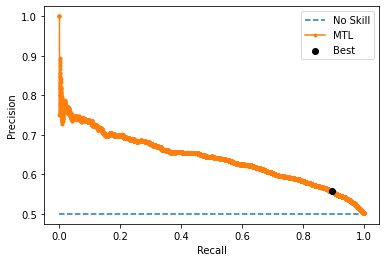

y_test value counts:
 Counter({1: 5012, 0: 5012})
y_pred value counts:  Counter({1: 5056, 0: 4968})

Confusion matrix: 
[[3106 1906]
 [1862 3150]]
Precision:  0.6230221518987342
Sensitivity/recall:  0.6284916201117319
Specificity:  0.6197126895450917
Accuracy:  0.6241021548284118
PR AUC: 0.641
f_score:  0.6257449344457687


In [ ]:
#above code but with less bumber of layers
#single disease single dataset - Diabetes and Depression

dfB_ = dfB.copy()
dfS_ = dfS.copy()
dfB_['all'] =  dfB_['diabetes'].astype(str) + dfB_['cvd'].astype(str)
dfS_['all'] =  dfS_['diabetes'].astype(str) + dfS_['cvd'].astype(str)

#keep rows with only single disease subjects
dfB_ = dfB_.loc[(dfB_['all'] == '10') | (dfB_['all'] == '01') | (dfB_['all'] == '11')]
dfS_ = dfS_.loc[(dfS_['all'] == '10') | (dfS_['all'] == '01') | (dfB_['all'] == '11')]


#keep the columns which are in bestcols 
bigcols = []
for each in dfB_.columns.to_list():
  if each in bestcols:
    bigcols.append(each)

smallcols = []
for each in dfS_.columns.to_list():
  if each in bestcols:
    smallcols.append(each)

nB_cols = len(bigcols)
nS_cols = len(smallcols)
print("nB_cols: ", nB_cols)
print("nS_cols: ", nS_cols)

#reset the indexes of the newly created dataframes
dfB_.reset_index(drop=True, inplace=True)
dfS_.reset_index(drop=True, inplace=True)

print("shape of dfA_: ", dfB_.shape)
print("shape of dfB_: ", dfS_.shape)


print("-----Preparing initial datasets - Train and holdout-----")
cols = dfB_.columns.tolist()
cols.remove('diabetes')
cols.remove('depression')
cols.remove('cvd')

df_XB = dfB[bigcols]
df_YB = dfB[['diabetes', 'cvd']]

colsS = dfS.columns.tolist()
colsS.remove('diabetes')
colsS.remove('depression')
colsS.remove('cvd')

df_XS = dfS[smallcols]
df_YS = dfS[['diabetes', 'cvd']]


#prepare train and test dataset manually from the bigger dataset
test_size  = int(df_XB.shape[0] * 0.02)
df1 = df_YB.copy()
df1['out'] = df1['diabetes'].astype(str) + df1['cvd'].astype(str)
dis_cols  = df1['out'].unique().tolist()
rowsfortestB = []
for each in dis_cols:
  tempY = df1[df1.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestB.append(rows)

rowsfortestB = [j for i in rowsfortestB for j in i]
X_testB = df_XB.loc[rowsfortestB]
y_testB = df_YB.loc[rowsfortestB]
X_trainB = df_XB.loc[~df_XB.index.isin(rowsfortestB)]
y_trainB= df_YB.loc[~df_YB.index.isin(rowsfortestB)]

print("\nDistribution of Dataset B")
print("shape of X_trainB: ", X_trainB.shape)
print("shape of y_trainB: ", y_trainB.shape)
print("shape of X_testB: ", X_testB.shape)
print("shape of y_testB: ", y_testB.shape)

#prepare train and test dataset manually from the small dataset
df1S = df_YS.copy()
df1S['out'] = df1S['diabetes'].astype(str) +df1S['cvd'].astype(str)

rowsfortestS = []
for each in dis_cols:
  tempY = df1S[df1S.out == each]
  rows = np.random.choice(tempY.index.values, int(test_size/len(dis_cols)))
  rowsfortestS.append(rows)

rowsfortestS = [j for i in rowsfortestS for j in i]
X_testS = df_XS.loc[rowsfortestS]
y_testS = df_YS.loc[rowsfortestS]
X_trainS = df_XS.loc[~df_XS.index.isin(rowsfortestS)]
y_trainS = df_YS.loc[~df_YS.index.isin(rowsfortestS)]

print("\nDistribution of Dataset S")
print("shape of X_trainS: ", X_trainS.shape)
print("shape of y_trainS: ", y_trainS.shape)
print("shape of X_testS: ", X_testS.shape)
print("shape of y_testS: ", y_testS.shape)


#get indices of categorical features

#Dataset S
cols = X_trainS.columns.tolist()
categorical_featS = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featS.append(cols.index(each))
print(categorical_featS)

#Datset B
cols = X_trainB.columns.tolist()
categorical_featB = []
for each in cols:
    if feat_cat[each] == 'cat':
        categorical_featB.append(cols.index(each))
print(categorical_featB)


#for smaller dataset
# perform a scaler transform on train and test dataset
trans = StandardScaler()
trans.fit(X_trainB)

data1 = trans.transform(X_trainB)
X_trainB = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans.transform(X_testB)
X_testB = pd.DataFrame(data2)

#for smaller dataset
# perform a scaler transform on train and test dataset
trans1 = StandardScaler()
trans1.fit(X_trainS)

data1 = trans1.transform(X_trainS)
X_trainS = pd.DataFrame(data1)
#Apply same parameters of standardization on test as on train
data2 = trans1.transform(X_testS)
X_testS = pd.DataFrame(data2)


# Model configuration
batch_size = 512
no_epochs = 5
verbosity = 1
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=2, random_state=36851234)

# K-fold Cross Validation model evaluation
fold_no = 1

inputs = X_trainB.copy()
targets = y_trainB.copy()


# Define the layers of the model
input_A = Input(shape = (nB_cols,), name = 'Dataset A')
input_B = Input(shape = (nS_cols,), name = 'Dataset B')
out = Concatenate()([input_A, input_B])
dense_hidden_1 = Dense(55, activation = 'relu', name = 'dense_hidden_1')(out)
dense_hidden_1_d = Dropout(0.5)(dense_hidden_1)
dense_hidden_2 = Dense(50, activation = 'relu', name = 'dense_hidden_2')(dense_hidden_1_d)
dense_hidden_2_d = Dropout(0.25)(dense_hidden_2)
dense_hidden_3 = Dense(45, activation = 'relu', name = 'dense_hidden_3')(dense_hidden_2_d)
dense_hidden_3_d = Dropout(0.1)(dense_hidden_3)
dense_hidden_4 = Dense(40, activation = 'relu', name = 'dense_hidden_4')(dense_hidden_3_d)


dense_branch_diab1 = Dense(35, activation = 'relu', name = 'dense_branch_diab1')(dense_hidden_4)
#dense_hidden_diab1_d = Dropout(0.25)(dense_branch_diab1)
dense_branch_diab2 = Dense(30, activation = 'relu', name = 'dense_branch_diab2')(dense_branch_diab1)
diabetes = Dense(1, activation = 'sigmoid', name = 'diabetes')(dense_branch_diab2)


dense_branch_cvd1 = Dense(35, activation = 'relu', name = 'dense_branch_cvd1')(dense_hidden_4)
#dense_hidden_cvd1_d = Dropout(0.25)(dense_branch_cvd1)
dense_branch_cvd2 = Dense(30, activation = 'relu', name = 'dense_branch_cvd2')(dense_branch_cvd1)
cvd = Dense(1, activation = 'sigmoid', name ='cvd')(dense_branch_cvd2)

for train, test in kfold.split(inputs, targets['diabetes']):

  trainX = inputs.iloc[train]
  trainy = targets.iloc[train]
  testXB = inputs.iloc[test]
  testyB = targets.iloc[test]
  #print("shape of trainX: ", trainX.shape)
  #print("trainy orig unique: \n", trainy.value_counts())
  
  # split the small dataset into train and validation
  X_train_s, X_tests, y_train_s, y_tests = train_test_split(X_trainS, y_trainS, test_size=0.20,  stratify=y_trainS['diabetes'])
  

  #merge the target columns for undersampling
  df1 = trainy.copy()
  df1['out'] = df1['diabetes'].astype(str) +df1['cvd'].astype(str)

  #drop some 00 rows
  orig_count = df1['out'].value_counts().to_dict()
  orig_count['00'] = 0
  all_values = orig_count.values()
  orig_count['00'] = int(max(all_values))
  #orig_count['011'] = int(orig_count['011']*0.60)
  #print("orig_count after: ", orig_count)
  # define the undersampling method
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = orig_count)
  trainy = df1['out']
  df_US_X, df_US_y = undersample.fit_resample(trainX, trainy)


  print("\nOversampling the dataset B using SMOTE-NC")
  #oversample the dataset
  samp_count = df1['out'].value_counts().to_dict()
  print("Class distribution before smote: ", samp_count)
  #samp_count['100'] = int(samp_count['000']/2)
  #samp_count['110'] = int(samp_count['000']/2)
  oversample = SMOTENC(categorical_features=categorical_featB)
  df_OS_X, df_OS_y = oversample.fit_resample(df_US_X, df_US_y)


  #split the 'out column to 3 target diseases 
  a = pd.DataFrame(df_OS_y)
  a.columns = ['out']
  print("\nClass distribution in training - Dataset B:")
  print(a['out'].value_counts())
  #print("['out'] count after SMOTE: \n",a['out'].value_counts())
  a['diabetes'] = a['out'].str[:1]
  a['cvd'] = a['out'].str[1:2]
  

  #convert datatype of target columns to int
  a['diabetes'] = a['diabetes'].astype(str).astype(int)
  a['cvd'] = a['cvd'].astype(str).astype(int)
  a.drop(['out'], axis = 1)
  trainXB = df_OS_X.copy()
  trainyB = a.copy()



  #create input_S dataset for training
  print("\nPreparing training data for Dataset S")
  m = trainXB.shape[0]
  yb = trainyB.copy()
  yb['all'] = yb['diabetes'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_train_s.copy()
  S_y['all'] = S_y['diabetes'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_train_s.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_train_s, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'cvd','newind'], axis = 1)
  trainXS = X_res.copy()

  print("Dataset B train shape: ", trainXB.shape)
  print("Dataset S train shape: ", trainXS.shape)

  #create input_S dataset for validation
  print("\nPreparing training data for Dataset S")
  m = testXB.shape[0]
  yb = testyB.copy()
  yb['all'] = yb['diabetes'].astype(str) +yb['cvd'].astype(str)
  #print("y counts for train: \n", ys['all'].value_counts())
  yb_count = yb['all'].value_counts().to_dict()
  #print("yb_count: ", yb_count)
  S_y = y_tests.copy()
  S_y['all'] = S_y['diabetes'].astype(str) +S_y['cvd'].astype(str)
  S_y_count = S_y['all'].value_counts().to_dict()
  #print("B_y['all'] counts: \n", B_y_count)

  colmov = S_y[['diabetes', 'cvd']]
  #print("shape of X_train_s: ", X_train_s.shape)
  #print("shape of S_y: ", S_y.shape)
  X_tests.reset_index(drop=True, inplace=True)
  colmov.reset_index(drop=True, inplace=True)
  df_XSn = pd.concat([X_tests, colmov], axis=1, join="inner") 
  #print("shape of df_XSn: ", df_XSn.shape)
  #print("shape of B_y: ", B_y.shape)

  S_y_countNew = S_y_count.copy()
  for each in S_y_count:
    if S_y_count[each] > yb_count[each]:
      S_y_countNew[each] = yb_count[each]

  #some classes in S_y have more samples than in ys, drop the extra samples
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy = S_y_countNew)
  df_S_X, df_S_y = undersample.fit_resample(df_XSn, S_y['all'])
  
  ros = RandomOverSampler(sampling_strategy = yb_count)

  X_res, y_res = ros.fit_resample(df_S_X, df_S_y)
  X_res = pd.DataFrame(X_res, columns = df_XSn.columns)
  y_res = pd.DataFrame(y_res)
  y_res.columns = ['all']
  
  #print("X_res shape: ", X_res.shape)
  #print("y_res shape: ", y_res.shape)
  y_res['newind'] = 0
  for each in yb_count:
    indexes = yb.loc[yb['all']==each].index.tolist()
    y_res.loc[y_res['all'] == each, 'newind'] = indexes
  X_res = pd.concat([X_res, y_res['newind']], axis=1, join="inner")
  X_res = X_res.sort_values('newind')
  X_res.reset_index(drop=True, inplace=True)
  X_res = X_res.drop(['diabetes', 'cvd','newind'], axis = 1)
  testXS = X_res.copy()
  

  print("Dataset B validation shape: ", testXB.shape)
  print("Dataset S validation shape: ", testXS.shape)

  model = tf.keras.models.Model([input_A, input_B], [diabetes, cvd])

  initial_learning_rate = 0.1
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=10000,
      decay_rate=0.96,
      staircase=True)
  optimizersgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
  optimizeradam = tf.keras.optimizers.Adam(lr=0.00001)

  model.compile(
      loss={
          'diabetes': 'binary_crossentropy',
          'cvd': 'binary_crossentropy'
      },
      optimizer = optimizeradam,
      metrics = ['accuracy']
  )  
    
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  #print("len(df_OS_X): ", len(df_OS_X))
  #print("len(testX): ", len(testX))


  # Fit data to model
  history = model.fit([trainXB, trainXS], [trainyB['diabetes'],trainyB['cvd']],
            validation_data = ([testXB, testXS], [testyB['diabetes'], testyB['cvd']]),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1)

  # Generate generalization metrics
  scores = model.evaluate([testXB, testXS], [testyB['diabetes'], testyB['cvd']], verbose=0)

#  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# acc_per_fold.append(scores[1] * 100)
#  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

'''
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
'''

#sort both test datasets to align target disease columns
y_testB.reset_index(drop=True, inplace=True)
X_testB.reset_index(drop=True, inplace=True)
y_testB['all'] = y_testB['diabetes'].astype(str) +y_testB['cvd'].astype(str) 

#create a dataframe for target variables of test B
all_testXB = pd.concat([X_testB, y_testB['all']], axis=1, join="inner")
all_testXB.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXB['all'].copy()
all_testXB = all_testXB.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset B:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['cvd'] = a['all'].str[1:2]
all_testyB = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyB['diabetes'] = all_testyB['diabetes'].astype(str).astype(int)
all_testyB['cvd'] = all_testyB['cvd'].astype(str).astype(int)


y_testS.reset_index(drop=True, inplace=True)
X_testS.reset_index(drop=True, inplace=True)
y_testS['all'] = y_testS['diabetes'].astype(str) +y_testS['cvd'].astype(str) 
#create a dataframe for target variables of test S
all_testXS = pd.concat([X_testS, y_testS['all']], axis=1, join="inner")
all_testXS.sort_values(by=['all'])
a = pd.DataFrame(columns=['all'])
a['all'] = all_testXS['all'].copy()
all_testXS = all_testXS.drop(['all'], axis = 1)
print("\nClass distribution in test - Dataset S:")
print(a['all'].value_counts())
#print("['out'] count after SMOTE: \n",a['out'].value_counts())
a['diabetes'] = a['all'].str[:1]
a['cvd'] = a['all'].str[1:2]
all_testyS = a.drop('all', axis=1)
#convert datatype of target columns to int
all_testyS['diabetes'] = all_testyS['diabetes'].astype(str).astype(int)
all_testyS['cvd'] = all_testyS['cvd'].astype(str).astype(int)



preds = model.predict([all_testXB, all_testXS])
# Metrics for each target disease
target_v = ['diabetes', 'cvd']

pred_threshold = {}

for each in target_v:
  print("\n------------------------------------------------------")
  print(each)
  print("------------------------------------------------------")

  #preds = model.predict(X_test)
  y_true = all_testyB[each]
  predictions = preds[target_v.index(each)]

  lr_probs = predictions

  fpr, tpr, thresholds = roc_curve(y_true, lr_probs)
  # calculate the g-mean for each threshold
  gmeans = np.sqrt(tpr * (1-fpr))
  # locate the index of the largest g-mean
  ix = np.argmax(gmeans)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  # plot the roc curve for the model
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(fpr, tpr, marker='.', label='MTL',  zorder=-1)
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()

  #threshold based on ROC
  th = thresholds[ix]

  # calculate precision and recall for each threshold
  lr_precision, lr_recall, thresholds = precision_recall_curve(y_true, lr_probs)
  # convert to f score
  fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  # calculate scores
  #lr_f1, lr_auc = f1_score(y_over, y_pred), auc(lr_recall, lr_precision)
  # summarize scores
  #print('NN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
  # plot the roc curve for the model
  no_skill = len(y_true[y_true==1]) / len(y_true)
  pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', zorder=-1)
  pyplot.plot(lr_recall, lr_precision, marker='.', label='MTL', zorder=-1)
  pyplot.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best', zorder=2)
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  pyplot.legend()
  # show the plot
  pyplot.show()
  
  pred_threshold[each] = thresholds[ix]

  y_pred = [1 * (x[0]>th) for x in predictions]
  
  matrix = confusion_matrix(y_true, y_pred)
  print("y_test value counts:\n",Counter(y_true))
  print("y_pred value counts: ", Counter(y_pred))
  print("\nConfusion matrix: ")
  print(matrix)

  tn, fp, fn, tp = matrix.ravel()
  recall = tp/(tp+fn)
  precision = tp/(fp+tp)
  specifcity = tn/(fp+tn)
  acc = (tn+tp)/(tn+fp+fn+tp)
  auc_score = auc(lr_recall, lr_precision)
  print("Precision: ", precision)
  print("Sensitivity/recall: ", recall)
  print("Specificity: ", specifcity)
  print("Accuracy: ", acc)
  print('PR AUC: %.3f' % auc_score)

  f_score = f1_score(y_true, y_pred)
  print("f_score: ", f_score)



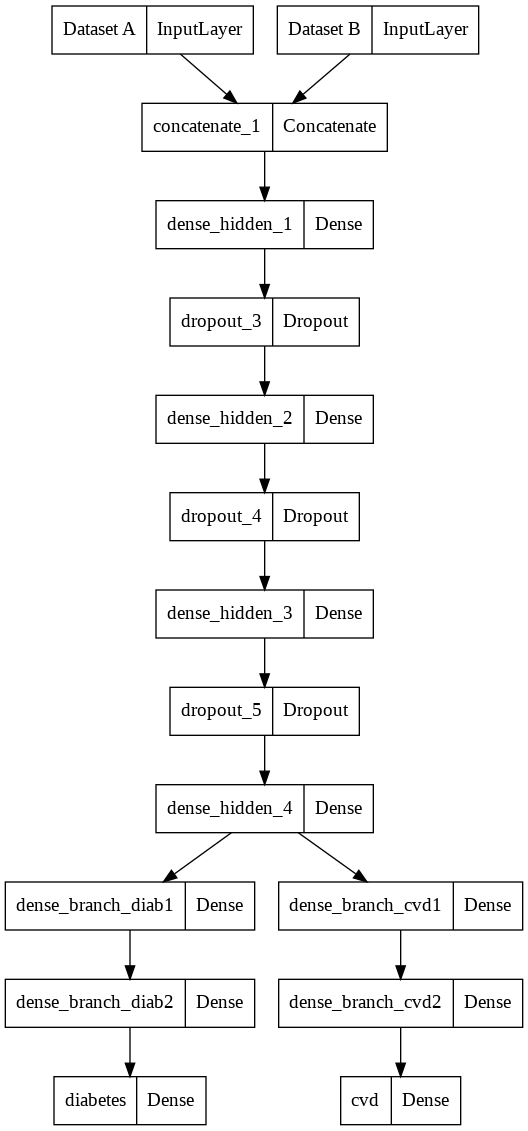

In [ ]:
tf.keras.utils.plot_model(model)